In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [57]:
import pandas as pd
path = "/Users/filipecarvalho/Documents/data_science_projects/antónio/CRI_Orthopedic_Traumatology_21_22_23.csv"
df = pd.read_csv(path,delimiter=";")

In [58]:
columns_list = list(df.columns)
print(columns_list)


['SEXO', 'DTA NASC', 'DCF', 'DTA OBITO', 'NUM LIC', 'DTA ENTRADA LIC', 'NUM AGENDA', 'HORA AGEND', 'DIAS AGEND', 'AGEND7DIAS', 'NUM INTERV', 'DTA INTERV', 'ANO INTERV', 'PRIORIDADE', 'MES INTERV', 'DIA SEM', 'AREA', 'SEMANA ANO', 'ESPECIALIDADE', 'AMBULATORIA', 'COD TIPO INTERV', 'TIPO INTERVENCAO', 'programada urgente', 'conv amb urg', 'base adic urg', 'ESTADO CIRSEGURA', 'COD ESP', 'BLO ESP', 'ambulat', 'tend amb', 'UNIDD FUNCIONAL', 'grupo estatistico', 'polo especialidade', 'SICA', 'OUT ESP', 'COD BLOCO', 'DES BLOCO', 'COD SALA', 'DES SALA', 'CCUSTOS', 'DTA AGENDA', 'cod proveniencia', 'proveniencia', 'COD UNIDADE PROV', 'unidd saude prov blo', 'tipo unidd saude prov blo', 'modulo requisitante', 'episod requisitante', 'NUM TRANSFERENCIA', 'COD ESPEC PROV', 'COD DEST', 'destino bloco', 'COD UNIDADE DEST', 'unidd saude dest blo', 'tipo unidd saude dest blo', 'COD ESPEC DEST', 'DIAS PRE OP', 'DIAS NA INSTITUICAO', 'URG EPISODIO', 'URG LOC ADMISSAO', 'urg data hora admissao', 'INT EPIS

In [59]:
df.shape

(3132, 128)

In [60]:
import pandas as pd

# Função para converter colunas com vírgulas para pontos
def convert_comma_to_dot(df):
    # Iterar sobre todas as colunas
    for col in df.columns:
        # Verificar se a coluna é do tipo objeto (string)
        if df[col].dtype == 'object':
            # Tentar converter a coluna para numérico após substituir vírgulas por pontos
            try:
                df[col] = df[col].str.replace(',', '.').astype(float)
            except ValueError:
                # Se a conversão falhar, a coluna não é numérica e nada é feito
                pass
    return df

df = convert_comma_to_dot(df)


In [61]:
df.shape

(3132, 128)

In [62]:
def column_summary(df):
    summary_data = []
    
    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        num_of_nulls = df[col_name].isnull().sum()
        num_of_non_nulls = df[col_name].notnull().sum()
        num_of_distinct_values = df[col_name].nunique()
        
        if num_of_distinct_values <= 10:
            distinct_values_counts = df[col_name].value_counts().to_dict()
        else:
            top_10_values_counts = df[col_name].value_counts().head(10).to_dict()
            distinct_values_counts = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

        summary_data.append({
            'col_name': col_name,
            'col_dtype': col_dtype,
            'num_of_nulls': num_of_nulls,
            'num_of_non_nulls': num_of_non_nulls,
            'num_of_distinct_values': num_of_distinct_values,
            'distinct_values_counts': distinct_values_counts
        })
    
    summary_df = pd.DataFrame(summary_data)
    return summary_df

# Example usage:
# Assuming df is your DataFrame
summary_df = column_summary(df)
sorted_df = summary_df.sort_values(by='num_of_nulls', ascending=False)
display(sorted_df)


col_name col_dtype  num_of_nulls  num_of_non_nulls  num_of_distinct_values                             distinct_values_counts
81                   DES 2ACTO   float64          3132                 0                       0                                                 {}
90             ANEST ADICIONAL   float64          3132                 0                       0                                                 {}
80                   COD 2ACTO   float64          3132                 0                       0                                                 {}
82               CODACTO ROBOT   float64          3132                 0                       0                                                 {}
83                  ACTO ROBOT   float64          3132                 0                       0                                                 {}
7                   HORA AGEND   float64          3132                 0                       0                                                 {}
30             UNIDD FUNCIONAL   float64          3132                 0                       0                                                 {}
29                    tend amb   float64          3132                 0                       0                                                 {}
28                     ambulat   float64          3132                 0                       0                                                 {}
84                        PTCO   float64          3132                 0                       0                                                 {}
112                 TEMPO ALTA   float64          3132                 0                       0                                                 {}
44        unidd saude prov blo    object          3131                 1                       1                  {'CH PSIQUIATRICO LISBOA EPE': 1}
45   tipo unidd saude prov blo    object          3131                 1                       1                                           {'H': 1}
52            COD UNIDADE DEST   float64          3131                 1                       1                                     {3117503.0: 1}
53        unidd saude dest blo    object          3131                 1                       1                  {'CH PSIQUIATRICO LISBOA EPE': 1}
54   tipo unidd saude dest blo    object          3131                 1                       1                                           {'H': 1}
43            COD UNIDADE PROV   float64          3131                 1                       1                                     {3117503.0: 1}
85                      COLLON    object          3128                 4                       1                                        {'CCR2': 4}
104               HI Prep Sala   float64          3126                 6                       3            {0.333333: 3, 0.645833: 2, 0.708333: 1}
110            TEMPO Prep Sala   float64          3126                 6                       4  {0.013888: 2, 0.010416: 2, 0.018055: 1, 0.0173...
105               HF Prep Sala   float64          3124                 8                       7  {0.34375: 2, 0.347222: 1, 0.722222: 1, 0.35416...
121              ORDEM URG ASC   float64          3091                41                       4                 {1.0: 18, 2.0: 13, 3.0: 8, 4.0: 2}
122             ORDEM URG DESC   float64          3091                41                       5         {1.0: 24, 2.0: 11, 3.0: 4, 5.0: 1, 4.0: 1}
68       INT DES MOTIVO TRANSF    object          3035                97                       3  {'CONTINUACAO DE TRATAMENTO': 44, 'DOENTE DE F...
67       INT COD MOTIVO TRANSF   float64          3035                97                       3                        {6.0: 44, 5.0: 39, 4.0: 14}
9                   AGEND7DIAS   float64          2967               165                       2                                {0.0: 111, 1.0: 54}
3                    DTA O

In [63]:

df["DIAS NA INSTITUICAO"]= df["DIAS NA INSTITUICAO"].fillna(0)
df["DIAS PRE OP"]= df["DIAS PRE OP"].fillna(0) 

In [64]:
import pandas as pd

# Assuming df is your DataFrame and "COD DIAGNOSTICO" is the column you want to modify
df["COD DIAGNOSTICO"] = df["COD DIAGNOSTICO"].str.slice(stop=-3)




In [65]:
import pandas as pd

# Assuming you have a DataFrame 'df' with a column 'COD DIAGNOSTICO'
df['COD DIAGNOSTICO'] = df['COD DIAGNOSTICO'].astype('category')


In [66]:
import pandas as pd

#Todas estas variáveis têm 100% ou quase 100% de valores nulos


# Lista das colunas a serem removidas
colunas_para_remover = [
    'DES 2ACTO',
    'ANEST ADICIONAL',
    'COD 2ACTO',
    'CODACTO ROBOT',
    'ACTO ROBOT',
    'HORA AGEND',
    'UNIDD FUNCIONAL',
    'tend amb',
    'ambulat',
    'PTCO',
    'TEMPO ALTA',
    'unidd saude prov blo',
    'tipo unidd saude prov blo',
    'COD UNIDADE DEST',
    'unidd saude dest blo',
    'tipo unidd saude dest blo',
    'COD UNIDADE PROV',
    'COLLON',
    'HI Prep Sala',
    'TEMPO Prep Sala',
    'HF Prep Sala',
    "ORDEM URG ASC",
    "ORDEM URG DESC",  
    "INT DES MOTIVO TRANSF",
    "INT COD MOTIVO TRANSF",
    "AGEND7DIAS"
]

# Remover as colunas do DataFrame
df = df.drop(columns=colunas_para_remover)

In [67]:
import pandas as pd



# Identificar a percentagem de valores nulos em cada coluna
percentagem_nulos = df.isnull().mean()

# Listar colunas com mais de 50% de NaN
colunas_mais_50 = percentagem_nulos[percentagem_nulos > 0.5].index
print(colunas_mais_50)

Index(['DTA OBITO', 'DES GDH', 'TIPO GDH', 'FACT BLO AMB', 'ORDEM PADIC ASC', 'ORDEM PADIC DESC'], dtype='object')


In [68]:
#preencher as colunas que têm mais de 50% de nan com zeros
def preencher_nan(df):
    for col in df.columns:
        if df[col].isna().sum() > df.shape[0] * 0.5:
            df[col] = df[col].fillna(0)
    return

df["NIVEL GDH"]=df["NIVEL GDH"].fillna(0)

preencher_nan(df)


In [69]:
df.shape

(3132, 102)

In [70]:
import pandas as pd


# Calculando a proporção de valores nulos em cada coluna
proporcao_nulos = df.isnull().mean()

# Estratégias para colunas com 50% a 20% de NaN
colunas_50_20 = proporcao_nulos[(proporcao_nulos > 0.2) & (proporcao_nulos <= 0.5)].index
for coluna in colunas_50_20:
    if df[coluna].dtype == 'object':
        df[coluna] = df[coluna].fillna('Desconhecido')
    else:
        df[coluna] = df[coluna].fillna(df[coluna].mean())

# Estratégias para colunas com 20% a 1% de NaN
colunas_20_1 = proporcao_nulos[(proporcao_nulos > 0.0001) & (proporcao_nulos <= 0.2)].index
for coluna in colunas_20_1:
    if df[coluna].dtype == 'object':
        df[coluna] = df[coluna].fillna(df[coluna].mode()[0])
    else:
        df[coluna] = df[coluna].fillna(df[coluna].mean())


In [71]:
import pandas as pd
import numpy as np

# Supondo que df já exista e tenha as colunas de data

df['DTA NASC'] = pd.to_datetime(df['DTA NASC'])
df['DTA ENTRADA LIC'] = pd.to_datetime(df['DTA ENTRADA LIC'])
df['DTA INTERV'] = pd.to_datetime(df['DTA INTERV'])
df['DTA AGENDA'] = pd.to_datetime(df['DTA AGENDA'])
df['urg data hora admissao'] = pd.to_datetime(df['urg data hora admissao'])
df['DTA REGISTO INTERV'] = pd.to_datetime(df['DTA REGISTO INTERV'])
df['int data hora admissao'] = pd.to_datetime(df['int data hora admissao'])
df['INT DTA ALTA ADMIN'] = pd.to_datetime(df['INT DTA ALTA ADMIN'])

/var/folders/q3/ycc4hmlj3493q0x11zn3vgcc0000gn/T/ipykernel_14525/1819264005.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DTA AGENDA'] = pd.to_datetime(df['DTA AGENDA'])
/var/folders/q3/ycc4hmlj3493q0x11zn3vgcc0000gn/T/ipykernel_14525/1819264005.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['urg data hora admissao'] = pd.to_datetime(df['urg data hora admissao'])
/var/folders/q3/ycc4hmlj3493q0x11zn3vgcc0000gn/T/ipykernel_14525/1819264005.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DTA REGISTO INTERV'] = pd.to_datetime(df['DTA REGISTO INTERV']

In [72]:
# Dividir as datas em diferentes colunas (ano, mês, dia)
df['DTA NASC_ano'] = df['DTA NASC'].dt.year
df['DTA NASC_mes'] = df['DTA NASC'].dt.month
df['DTA NASC_dia'] = df['DTA NASC'].dt.day

df['DTA ENTRADA LIC_ano'] = df['DTA ENTRADA LIC'].dt.year
df['DTA ENTRADA LIC_mes'] = df['DTA ENTRADA LIC'].dt.month
df['DTA ENTRADA LIC_dia'] = df['DTA ENTRADA LIC'].dt.day

df['DTA INTERV_ano'] = df['DTA INTERV'].dt.year
df['DTA INTERV_mes'] = df['DTA INTERV'].dt.month
df['DTA INTERV_dia'] = df['DTA INTERV'].dt.day

df['DTA AGENDA_ano'] = df['DTA AGENDA'].dt.year
df['DTA AGENDA_mes'] = df['DTA AGENDA'].dt.month
df['DTA AGENDA_dia'] = df['DTA AGENDA'].dt.day

# Para 'urg data hora admissao' e 'DTA REGISTO INTERV', adicionar colunas de ano, mês, dia e hora
df['urg_data_hora_admissao_ano'] = df['urg data hora admissao'].dt.year
df['urg_data_hora_admissao_mes'] = df['urg data hora admissao'].dt.month
df['urg_data_hora_admissao_dia'] = df['urg data hora admissao'].dt.day
df['urg_data_hora_admissao_hora'] = df['urg data hora admissao'].dt.hour

df['DTA_REGISTO_INTERV_ano'] = df['DTA REGISTO INTERV'].dt.year
df['DTA_REGISTO_INTERV_mes'] = df['DTA REGISTO INTERV'].dt.month
df['DTA_REGISTO_INTERV_dia'] = df['DTA REGISTO INTERV'].dt.day
df['DTA_REGISTO_INTERV_hora'] = df['DTA REGISTO INTERV'].dt.hour

# Opcional: Exibir as primeiras linhas do DataFrame para verificar as novas colunas
#print(df.head())


In [73]:
from datetime import datetime
# Get today's date

today = pd.to_datetime(datetime.today().date())

# Calculate age
df['IDADE'] = (today - df['DTA NASC']).dt.days // 365

In [74]:
df_sorted = df.sort_values(by='IDADE', ascending=False)

In [87]:
df_sorted[["IDADE",'urg data hora admissao', "SEXO",'ORDEM PBASE DESC','urg data hora admissao' ]]

IDADE urg data hora admissao  SEXO  ORDEM PBASE DESC urg data hora admissao
988     105    2023-10-28 19:41:21     2          3.000000    2023-10-28 19:41:21
1846    105    2021-09-10 15:42:32     2          1.760296    2021-09-10 15:42:32
2315    105    2022-03-01 18:35:07     2          1.760296    2022-03-01 18:35:07
2362    105    2022-03-19 13:27:43     2          1.760296    2022-03-19 13:27:43
2741    104    2022-08-10 22:25:03     2          1.760296    2022-08-10 22:25:03
...     ...                    ...   ...               ...                    ...
3109     20    2022-12-16 13:59:57     1          2.000000    2022-12-16 13:59:57
2900     20    2022-10-08 14:40:19     1          3.000000    2022-10-08 14:40:19
543      19    2021-12-20 22:43:05     1          3.000000    2021-12-20 22:43:05
1025     19    2023-11-12 20:40:24     1          1.000000    2023-11-12 20:40:24
394      19    2023-04-29 15:58:46     1          1.000000    2023-04-29 15:58:46

[3132 rows x 5 columns]

In [ ]:
#create a new column name "OBITO" that is 1 if "DTA OBITO" not 0, 0 otherwise.
import numpy as np

# Assuming your DataFrame is named 'df' and has a column named 'DTA OBITO'
df['OBITO'] = np.where(df['DTA OBITO'] != 0, 1, 0)


In [ ]:
import pandas as pd

# Assuming you have a DataFrame 'df' with a column 'DES DIAGNOSTICO'
df['DES DIAGNOSTICO'] = df['DES DIAGNOSTICO'].str.replace(r'\bFrat\b', '', regex=True)
df['DES DIAGNOSTICO'] = df['DES DIAGNOSTICO'].apply(lambda x: ' '.join(x.split()[:3]) if len(x.split()) >= 4 else x)
df['DES DIAGNOSTICO'] = df['DES DIAGNOSTICO'].str.lstrip(', ')

In [ ]:
df["COD ESPEC PROV"] = df["COD ESPEC PROV"].fillna(0)

In [ ]:
df["COD ESPEC DEST"]=df["COD ESPEC DEST"].astype(int)

In [ ]:
df=df.drop("INT COD DESTINO",axis=1)

In [ ]:
df= df.drop("DTA OBITO", axis=1)
df= df.drop("DTA NASC", axis=1)

In [ ]:
df.isnull().sum().sum()


0

In [ ]:
df.to_csv('data_filtered_and_imputed.csv', index=False)

In [ ]:
df.dtypes.value_counts()

object            41
float64           36
int32             20
int64             16
datetime64[ns]     7
category           1
Name: count, dtype: int64

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr, chi2_contingency
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
df=df.drop("DTA NASC_ano", axis=1)
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Assume df is your DataFrame
# Separando colunas numéricas e categóricas, excluindo certas colunas
exclude_cols = ["INT DES DESTINO", "DTA OBITO", "DIAS NA INSTITUICAO", "OBITO", "DIAS NA INSTITUICAO_label", "DIAS NA INSTITUICAO_CATEGORIA"]
numerical_cols = df.select_dtypes(include=[np.number]).columns.difference(exclude_cols)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.difference(exclude_cols)

# Criando cópias das colunas relevantes para não alterar o DataFrame original
numerical_data = df[numerical_cols].copy()
categorical_data = df[categorical_cols].copy()

# Imputação (caso ainda não tenha sido feita)
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

numerical_data = num_imputer.fit_transform(numerical_data)
categorical_data = cat_imputer.fit_transform(categorical_data)

# Convertendo todas as colunas categóricas para strings para garantir a uniformidade
categorical_data = pd.DataFrame(categorical_data, columns=categorical_cols).astype(str)

# Label Encoding para colunas categóricas
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    categorical_data[col] = le.fit_transform(categorical_data[col])
    label_encoders[col] = le

# Adicionando a coluna OBITO ao DataFrame temporário
temp_df = pd.DataFrame(numerical_data, columns=numerical_cols)
temp_df[categorical_cols] = categorical_data
temp_df["OBITO"] = df["OBITO"].values

# Calculando correlações para variáveis numéricas
correlation_results = {}
for col in numerical_cols:
    correlation, _ = pointbiserialr(temp_df["OBITO"], temp_df[col])
    correlation_results[col] = correlation

# Calculando correlações para variáveis categóricas
for col in categorical_cols:
    confusion_matrix = pd.crosstab(temp_df["OBITO"], temp_df[col]).to_numpy()
    correlation = cramers_v(confusion_matrix)
    correlation_results[col] = correlation

# Exibindo os resultados ordenados
correlation_df = pd.DataFrame(list(correlation_results.items()), columns=['Variable', 'Correlation with OBITO'])
correlation_df = correlation_df.sort_values(by='Correlation with OBITO', ascending=False)
print(correlation_df)


                        Variable  Correlation with OBITO
36                         IDADE                0.224928
94                   RISCO ANEST                0.210898
39                     NIVEL GDH                0.182954
78               COD DIAGNOSTICO                0.180905
77                      COD ACTO                0.163145
81                      DES ACTO                0.163145
45              ORDEM PADIC DESC                0.134026
70                   ANEST PRINC                0.129899
93                    PRIORIDADE                0.124231
80                    COD VERGDH                0.118412
76                  CIRURG PRINC                0.111998
99              TIPO INTERVENCAO                0.109476
101                base adic urg                0.109476
9                COD TIPO INTERV                0.099862
44               ORDEM PADIC ASC                0.090683
84                       DES GDH                0.089740
34                     HI Cirur

/var/folders/q3/ycc4hmlj3493q0x11zn3vgcc0000gn/T/ipykernel_3327/1884320225.py:15: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
/var/folders/q3/ycc4hmlj3493q0x11zn3vgcc0000gn/T/ipykernel_3327/1884320225.py:15: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
/var/folders/q3/ycc4hmlj3493q0x11zn3vgcc0000gn/T/ipykernel_3327/1884320225.py:15: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
/var/folders/q3/ycc4hmlj3493q0x11zn3vgcc0000gn/T/ipykernel_3327/1884320225.py:15: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
/var/folders/q3/ycc4hmlj3493q0x11zn3vgcc0000gn/T/ipykernel_3327/1884320225.py:15: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))


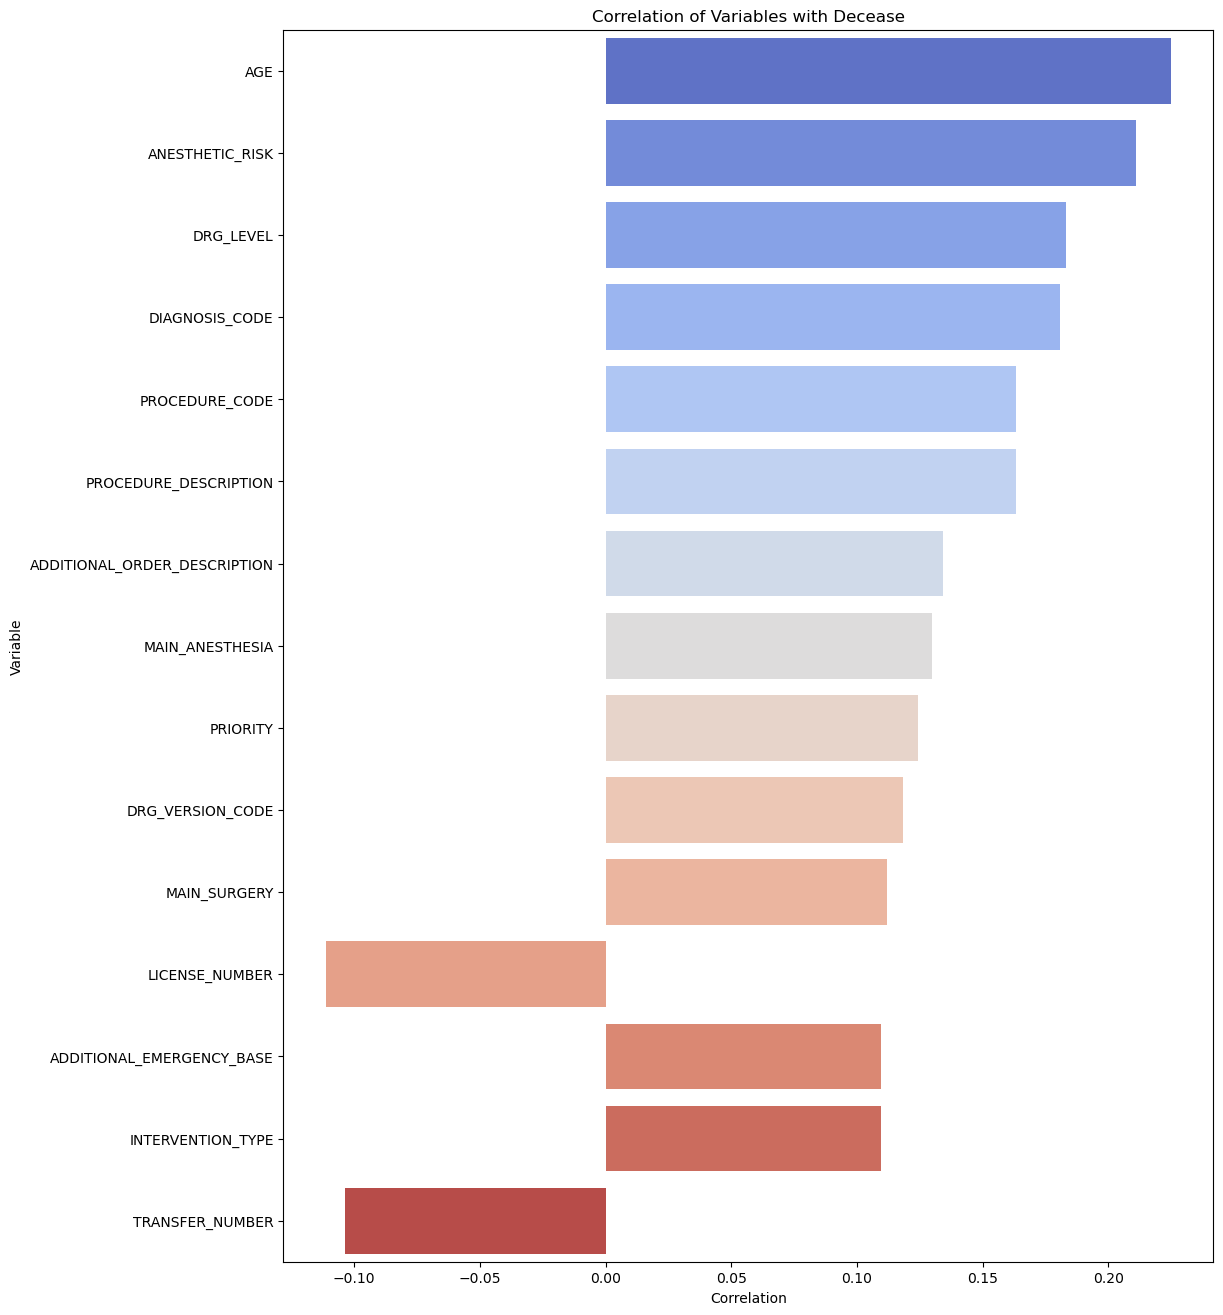

In [ ]:


# Removendo valores NaN
import pandas as pd
correlation_df = correlation_df.dropna(subset=["Correlation with OBITO"])

# Ordenando pelo valor absoluto da correlação
correlation_df_ob = correlation_df.reindex(correlation_df["Correlation with OBITO"].abs().sort_values(ascending=False).index)
# Filtrando correlações acima de 0.1 e abaixo de -0.1
correlation_df_ob = correlation_df_ob[(correlation_df_ob["Correlation with OBITO"] > 0.1) | (correlation_df_ob['Correlation with OBITO'] < -0.1)]
# Dicionário de mapeamento das variáveis
# Assumindo que você tem uma Series ou DataFrame com os valores originais
# Por exemplo, se for uma coluna chamada 'Variable':
# Assumindo que você tem uma Series ou DataFrame com os valores originais
# Por exemplo, se for uma coluna chamada 'Variable':

# Dicionário de mapeamento
variable_mapping = {
    'IDADE': 'AGE',
    'RISCO ANEST': 'ANESTHETIC_RISK',
    'NIVEL GDH': 'DRG_LEVEL',
    'COD DIAGNOSTICO': 'DIAGNOSIS_CODE',
    'COD ACTO': 'PROCEDURE_CODE',
    'DES ACTO': 'PROCEDURE_DESCRIPTION',
    'ORDEM PADIC DESC': 'ADDITIONAL_ORDER_DESCRIPTION',
    'ANEST PRINC': 'MAIN_ANESTHESIA',
    'PRIORIDADE': 'PRIORITY',
    'COD VERGDH': 'DRG_VERSION_CODE',
    'CIRURG PRINC': 'MAIN_SURGERY',
    'NUM LIC': 'LICENSE_NUMBER',
    'base adic urg': 'ADDITIONAL_EMERGENCY_BASE',
    'TIPO INTERVENCAO': 'INTERVENTION_TYPE',
    'NUM TRANSFERENCIA': 'TRANSFER_NUMBER'
}



# Se for uma coluna em um DataFrame
correlation_df_ob['Variable'] = correlation_df_ob['Variable'].map(variable_mapping)




# Criando o gráfico de barras horizontais
plt.figure(figsize=(12, 16))
sns.barplot(x='Correlation with OBITO', y='Variable', data=correlation_df_ob, palette='coolwarm')
plt.title('Correlation of Variables with Decease')
plt.xlabel('Correlation')
plt.ylabel('Variable')
plt.show()


In [ ]:
correlation_df_ob

Variable  Correlation with OBITO
36                            AGE                0.224928
94                ANESTHETIC_RISK                0.210898
39                      DRG_LEVEL                0.182954
78                 DIAGNOSIS_CODE                0.180905
77                 PROCEDURE_CODE                0.163145
81          PROCEDURE_DESCRIPTION                0.163145
45   ADDITIONAL_ORDER_DESCRIPTION                0.134026
70                MAIN_ANESTHESIA                0.129899
93                       PRIORITY                0.124231
80               DRG_VERSION_CODE                0.118412
76                   MAIN_SURGERY                0.111998
42                 LICENSE_NUMBER               -0.111327
101     ADDITIONAL_EMERGENCY_BASE                0.109476
99              INTERVENTION_TYPE                0.109476
43                TRANSFER_NUMBER               -0.103534

In [ ]:
mean_idade = df["IDADE"].mean()
print(f"The mean value of 'IDADE' column is: {mean_idade}")


The mean value of 'IDADE' column is: 69.25255427841634


In [ ]:
sexo_idade = df.groupby("SEXO")["IDADE"].mean()

In [ ]:
print(sexo_idade)

SEXO
1    57.370307
2    76.357653
Name: IDADE, dtype: float64


In [ ]:
std_idade_by_sexo = df.groupby("SEXO")["IDADE"].std()
print(std_idade_by_sexo)


SEXO
1    21.537553
2    17.634024
Name: IDADE, dtype: float64


In [ ]:
value_by_sexo = df["SEXO"].value_counts()
print(value_by_sexo)


SEXO
2    1960
1    1172
Name: count, dtype: int64


In [ ]:
sexo_obito = df.groupby("SEXO")["OBITO"].value_counts()
print(sexo_obito)

SEXO  OBITO
1     0        1087
      1          85
2     0        1799
      1         161
Name: count, dtype: int64


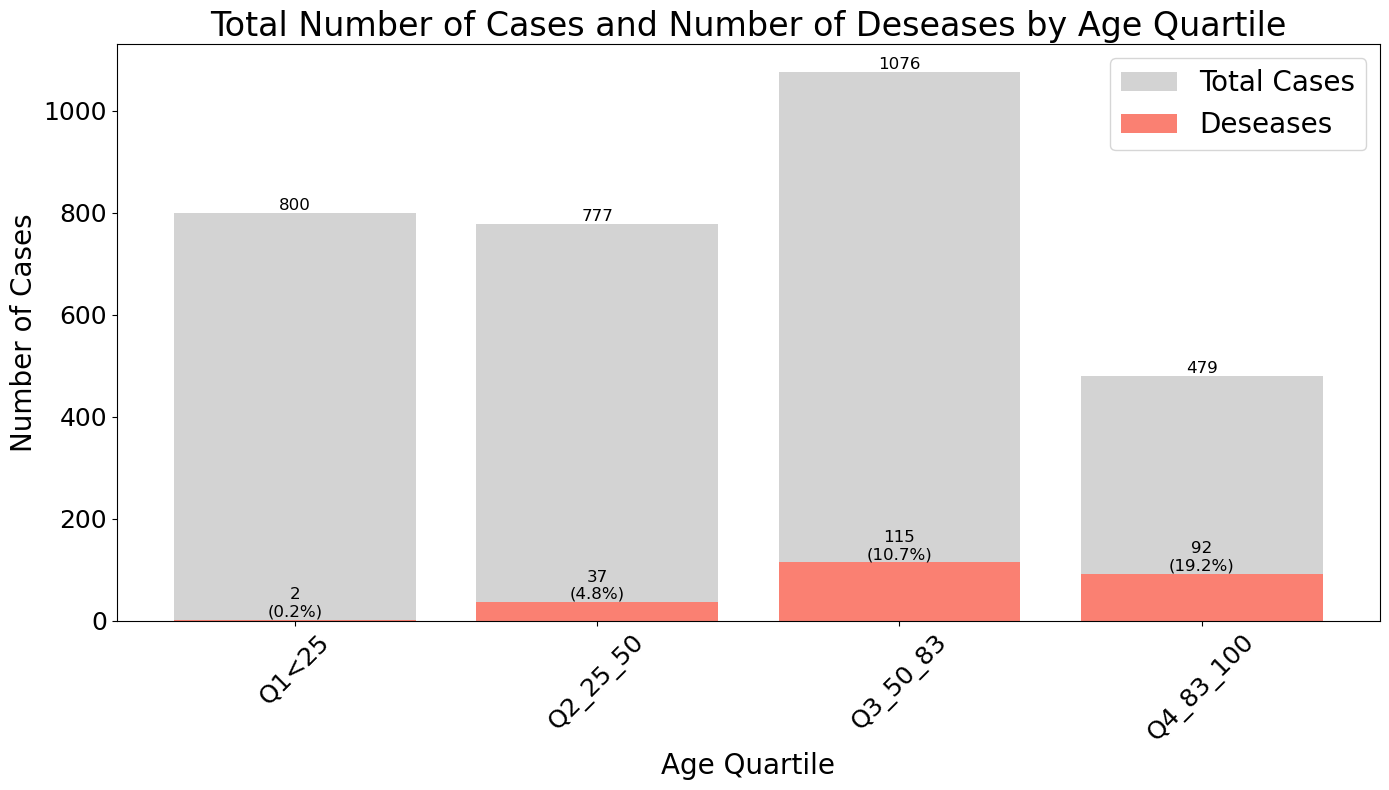

In [ ]:
# Calculate the quartiles on the numeric column
quartiles = df['IDADE'].quantile([0.25, 0.5, 0.83, 1.0])

# Definir os rótulos para os quartis
labels = ['Q1<25', 'Q2_25_50', 'Q3_50_83', 'Q4_83_100']
# Criar uma nova coluna com os rótulos dos quartis
df['IDADE_quartile_label'] = pd.cut(df['IDADE'], bins=[-float('inf')] + list(quartiles), labels=labels, include_lowest=True)
# Calculando a percentagem de OBITO para cada categoria de RISCO ANEST
obito_counts = df.groupby("IDADE_quartile_label")["OBITO"].value_counts().unstack().fillna(0)

# Calculando o total de casos por categoria de RISCO ANEST
total_counts = obito_counts.sum(axis=1)

# Calculando a percentagem de óbitos
obito_percentages = (obito_counts[1] / total_counts) * 100

# Plotando o gráfico de barras
fig, ax = plt.subplots(figsize=(14, 8))  # Aumentado o tamanho da figura

# Plotando o total de casos
total_bars = ax.bar(total_counts.index, total_counts, color='lightgrey', label='Total Cases')

# Plotando os casos de OBITO
obito_bars = ax.bar(obito_counts.index, obito_counts[1], color='salmon', label='Deseases')

# Adicionando os números e percentagens acima das barras
for total_bar, obito_bar, percentage in zip(total_bars, obito_bars, obito_percentages):
    total_height = total_bar.get_height()
    obito_height = obito_bar.get_height()
    
    ax.text(total_bar.get_x() + total_bar.get_width() / 2, total_height, f'{int(total_height)}', 
            ha='center', va='bottom', fontsize=12)  # Aumentado o tamanho da fonte
    ax.text(obito_bar.get_x() + obito_bar.get_width() / 2, obito_height, 
            f'{int(obito_height)}\n({percentage:.1f}%)', ha='center', va='bottom', color='black', fontsize=12)  # Aumentado o tamanho da fonte

# Configurando o título e os rótulos dos eixos
ax.set_title("Total Number of Cases and Number of Deseases by Age Quartile", fontsize=24)  # Aumentado o tamanho da fonte
ax.set_xlabel('Age Quartile', fontsize=20)  # Aumentado o tamanho da fonte
ax.set_ylabel('Number of Cases', fontsize=20)  # Aumentado o tamanho da fonte
ax.legend(fontsize=20)  # Aumentado o tamanho da fonte na legenda

# Rotacionando os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45, fontsize=18)  # Aumentado o tamanho da fonte
plt.yticks(fontsize=18)  # Aumentado o tamanho da fonte

# Ajustando o layout para evitar sobreposição
plt.tight_layout()

plt.show()

In [ ]:
#order de variables

# Sort the DataFrame by a single column
df_des = df.sort_values('DES ACTO')

In [ ]:
print(df_des["DES ACTO"])

1506    0HCFXZZ - mc>pele mama >extirp>pele mão dir>ex...
1591    0HQDXZZ - mc>pele mama >repar>pele antebraço d...
2371    0J980ZZ - mc>tecidsubcutfáscia >dren>fásciatec...
2312    0J980ZZ - mc>tecidsubcutfáscia >dren>fásciatec...
197     0J9C0ZZ - mc>tecidsubcutfáscia >dren>fásciatec...
                              ...                        
388     0YQL0ZZ - mc>reg anató extrem inf>repar>regtor...
361     XY0VX83 - novas tecnol>extracorp>introd>enxvei...
1179    XY0VX83 - novas tecnol>extracorp>introd>enxvei...
1176    XY0VX83 - novas tecnol>extracorp>introd>enxvei...
677     XY0VX83 - novas tecnol>extracorp>introd>enxvei...
Name: DES ACTO, Length: 3132, dtype: object


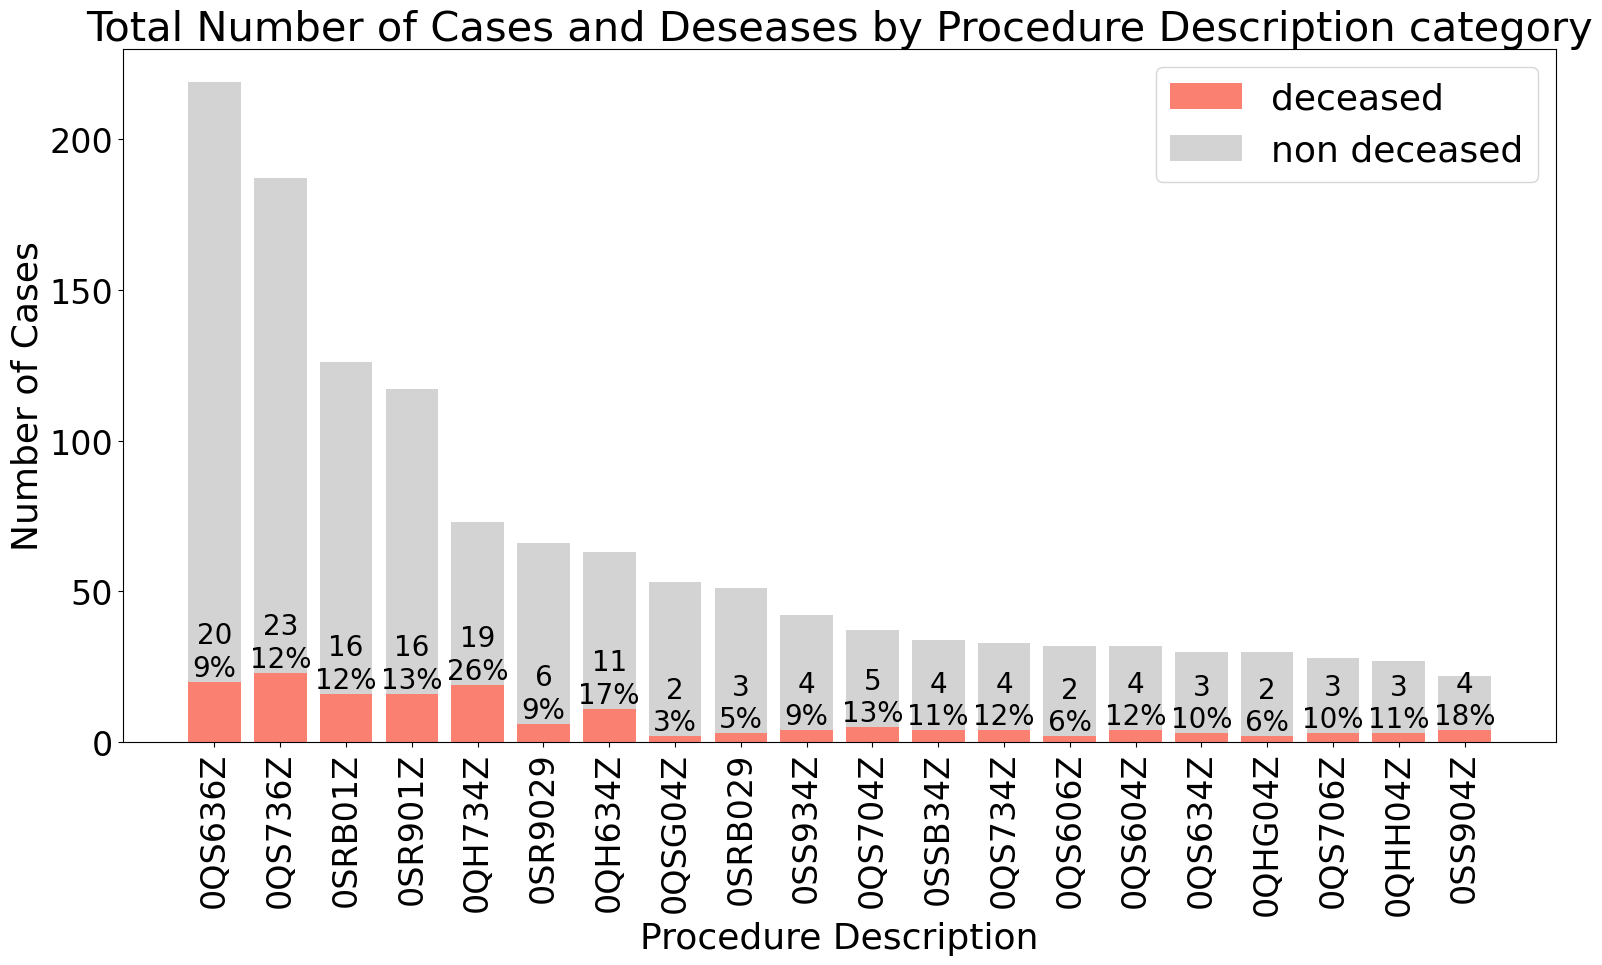

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named 'df' and the column is named 'column_name'
df['DES ACTO'] = df['DES ACTO'].str.split(' ').str[0]

import pandas as pd
import matplotlib.pyplot as plt

# Increase the default font size
plt.rcParams.update({'font.size': 18})

# Calculando a contagem de OBITO para cada categoria de COD ACTO
dia_counts = df.groupby("DES ACTO")["OBITO"].value_counts().unstack().fillna(0)

# Calculando o total de casos por categoria de COD ACTO
total_counts = dia_counts.sum(axis=1)

# Filtrando apenas categorias onde há pelo menos 1 óbito e o total é maior que 10
dia_counts = dia_counts[(dia_counts[1] >= 2) & (total_counts > 20)]
total_counts = total_counts[(dia_counts[1] >= 2) & (total_counts > 20)]

# Ordenando por número total de casos em ordem decrescente
sorted_indices = total_counts.sort_values(ascending=False).index
dia_counts = dia_counts.loc[sorted_indices]
total_counts = total_counts.loc[sorted_indices]

# Plotando o gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(16, 10))

# Plotando os casos de OBITO
dia_bars = ax.bar(dia_counts.index, dia_counts[1], color='salmon', label='deceased')

# Plotando o total de casos (casos não-óbito)
non_dia_bars = ax.bar(dia_counts.index, dia_counts[0], bottom=dia_counts[1], color='lightgrey', label='non deceased')

# Adicionando os números e percentagens acima das barras
for idx in range(len(dia_counts)):
    total_height = total_counts.iloc[idx]
    dia_height = dia_counts.iloc[idx][1]
    percentage = int((dia_height / total_height) * 100)
    
    ax.text(dia_counts.index[idx], dia_height, f'{int(dia_height)}\n{percentage}%', 
            ha='center', va='bottom', color='black', fontsize=20)

# Configurando o título e os rótulos dos eixos
ax.set_title('Total Number of Cases and Deseases by Procedure Description category', fontsize=30)
ax.set_xlabel("Procedure Description", fontsize=26)
ax.set_ylabel('Number of Cases', fontsize=26)
ax.legend(fontsize=26)

# Rotacionando os rótulos do eixo x para melhor visualização
plt.xticks(rotation=90, fontsize=24)
plt.yticks(fontsize=24)

# Ajustando o layout e mostrando o gráfico
plt.tight_layout()
plt.show()

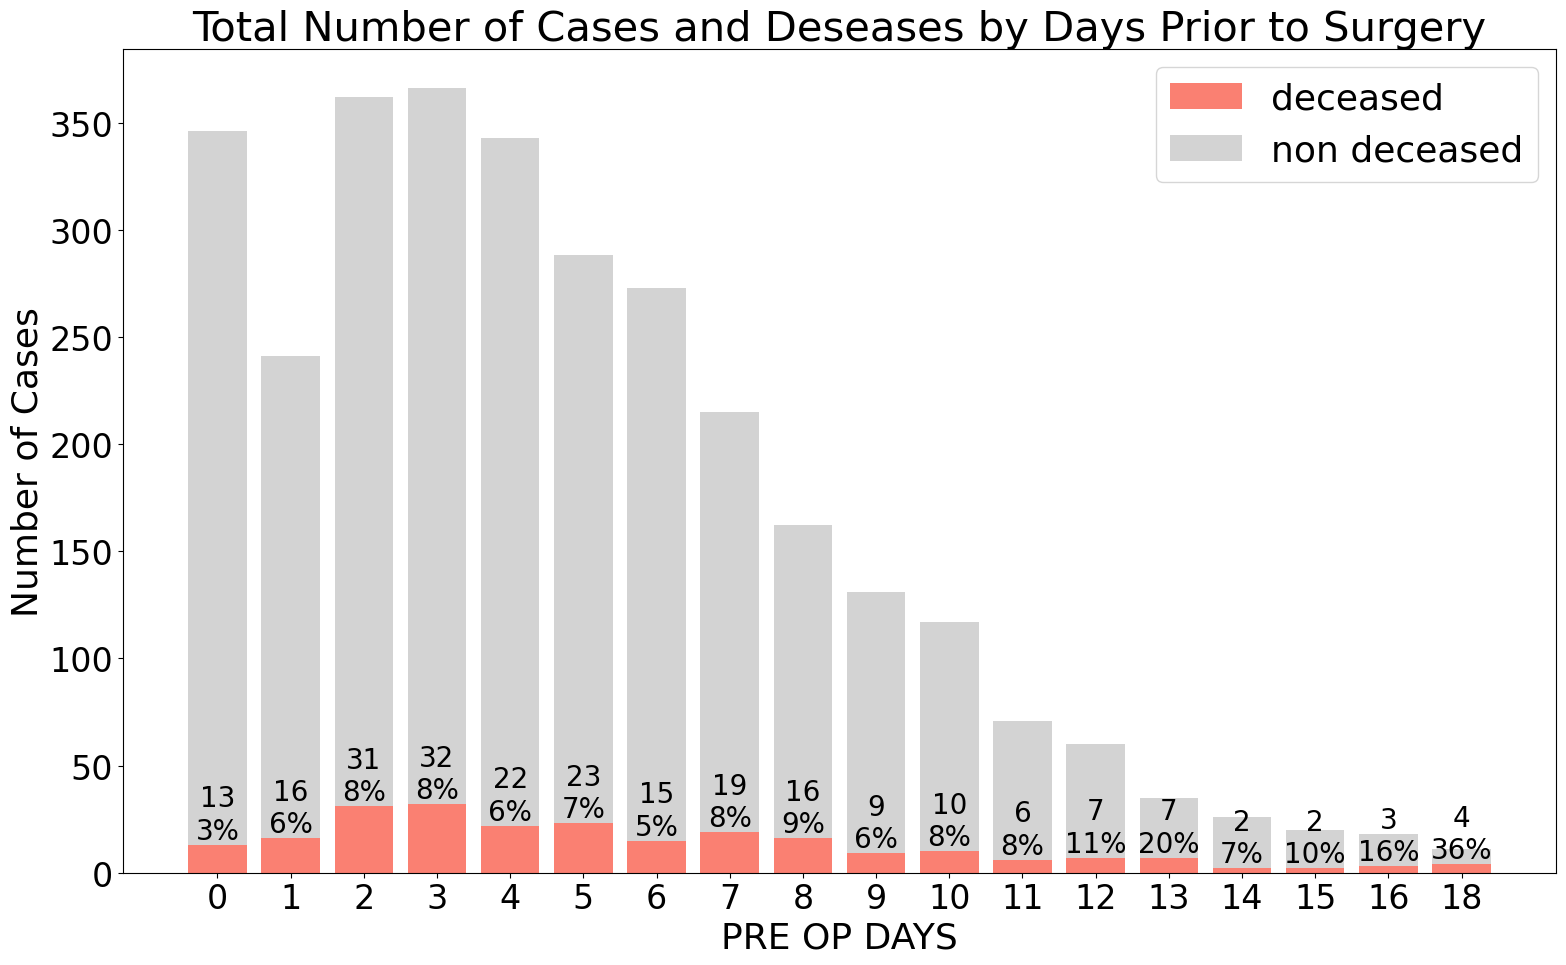

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Increase the default font size
plt.rcParams.update({'font.size': 18})

# Calculando a contagem de OBITO para cada categoria de COD ACTO
dia_counts = df.groupby("DIAS PRE OP")["OBITO"].value_counts().unstack().fillna(0)

# Calculando o total de casos por categoria de COD ACTO
total_counts = dia_counts.sum(axis=1)

# Filtrando apenas categorias onde há pelo menos 1 óbito e o total é maior que 10
dia_counts = dia_counts[(dia_counts[1] >= 1) & (total_counts > 10)]
total_counts = total_counts[(dia_counts[1] >= 1) & (total_counts > 10)]

# Convertendo o índice para inteiros e ordenando
dia_counts.index = dia_counts.index.astype(int)
dia_counts = dia_counts.sort_index()
total_counts = total_counts.sort_index()

# Plotando o gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(16, 10))

# Criando um array de posições para as barras
x = np.arange(len(dia_counts))

# Plotando os casos de OBITO
dia_bars = ax.bar(x, dia_counts[1], color='salmon', label='deceased')

# Plotando o total de casos (casos não-óbito)
non_dia_bars = ax.bar(x, dia_counts[0], bottom=dia_counts[1], color='lightgrey', label='non deceased')

# Adicionando os números e percentagens acima das barras
for i, (idx, row) in enumerate(dia_counts.iterrows()):
    total_height = total_counts.loc[idx]
    dia_height = row[1]
    percentage = int((dia_height / total_height) * 100)
    
    ax.text(i, dia_height, f'{int(dia_height)}\n{percentage}%', 
            ha='center', va='bottom', color='black', fontsize=20)

# Configurando o título e os rótulos dos eixos
ax.set_title('Total Number of Cases and Deseases by Days Prior to Surgery', fontsize=30)
ax.set_xlabel("PRE OP DAYS", fontsize=26)
ax.set_ylabel('Number of Cases', fontsize=26)
ax.legend(fontsize=26)

# Configurando os ticks do eixo x
ax.set_xticks(x)
ax.set_xticklabels(dia_counts.index, rotation=0, fontsize=24)

plt.yticks(fontsize=24)

# Ajustando o layout e mostrando o gráfico
plt.tight_layout()
plt.show()

In [ ]:
df["urg_data_hora_admissao_mes"].value_counts()

urg_data_hora_admissao_mes
12    524
9     262
10    257
7     255
6     241
3     238
8     237
11    236
4     236
5     235
1     217
2     194
Name: count, dtype: int64

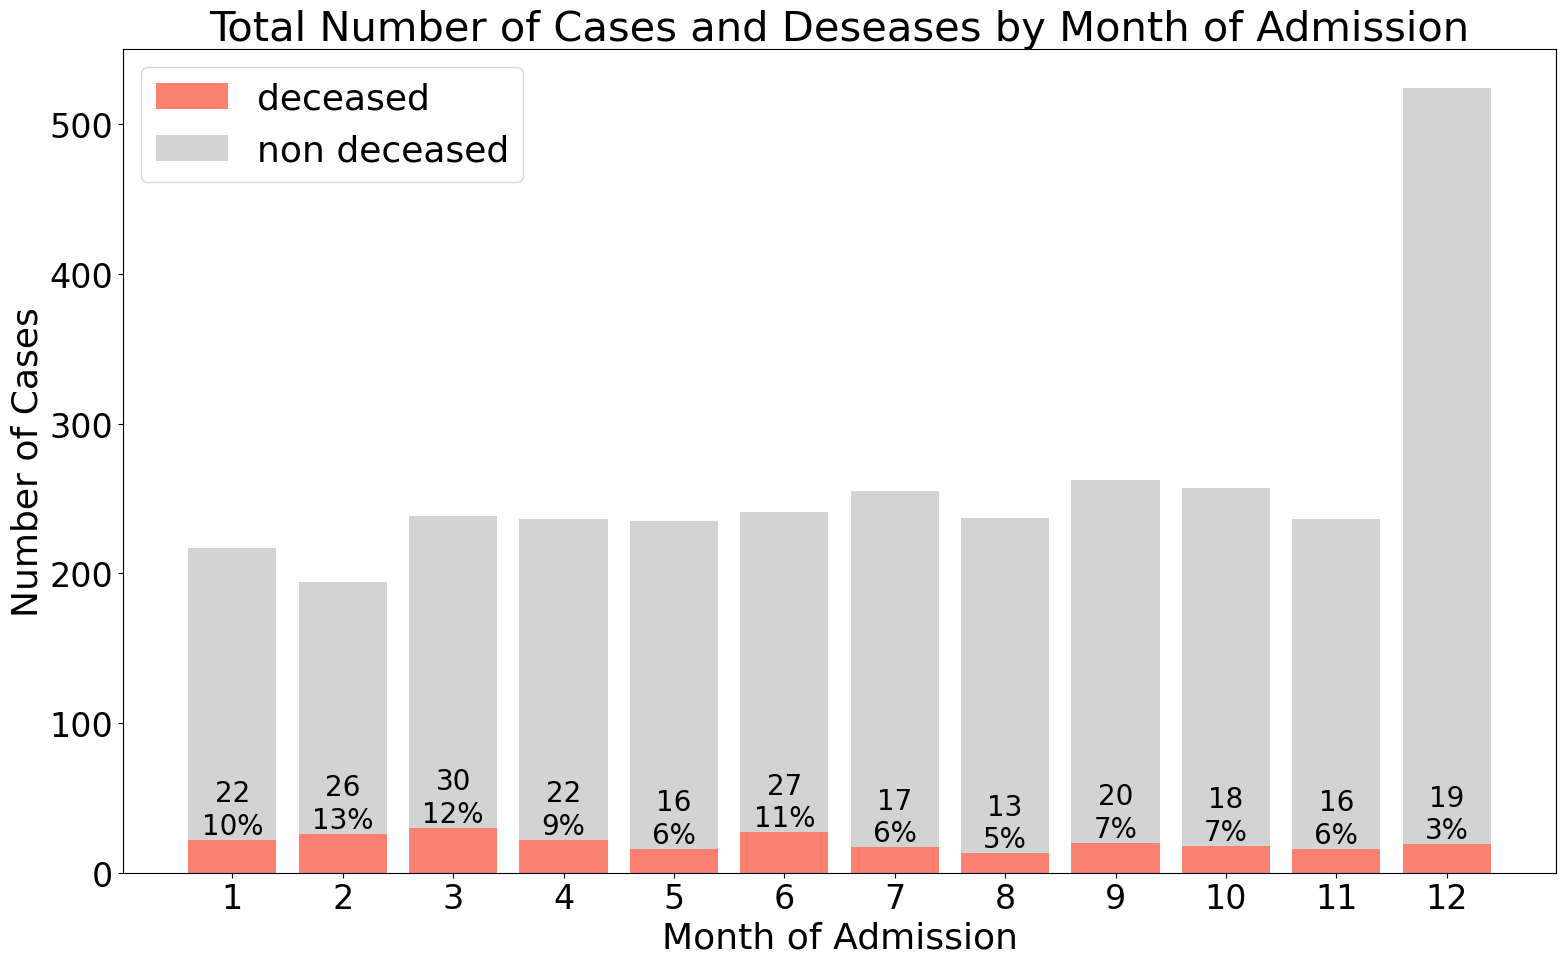

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Increase the default font size
plt.rcParams.update({'font.size': 18})

# Calculando a contagem de OBITO para cada categoria de COD ACTO
dia_counts = df.groupby("urg_data_hora_admissao_mes")["OBITO"].value_counts().unstack().fillna(0)

# Calculando o total de casos por categoria de COD ACTO
total_counts = dia_counts.sum(axis=1)

# Filtrando apenas categorias onde há pelo menos 1 óbito
mask = (dia_counts[1] >= 1) 
dia_counts = dia_counts[mask]
total_counts = total_counts[mask]

# Assegurando que o índice é numérico e ordenando
dia_counts.index = pd.to_numeric(dia_counts.index)
dia_counts = dia_counts.sort_index()
total_counts = total_counts.sort_index()

# Plotando o gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(16, 10))

# Criando um array de posições para as barras
x = np.arange(len(dia_counts))

# Plotando os casos de OBITO
dia_bars = ax.bar(x, dia_counts[1], color='salmon', label='deceased')

# Plotando o total de casos (casos não-óbito)
non_dia_bars = ax.bar(x, dia_counts[0], bottom=dia_counts[1], color='lightgrey', label='non deceased')

# Adicionando os números e percentagens acima das barras
for i, (idx, row) in enumerate(dia_counts.iterrows()):
    total_height = total_counts[idx]
    dia_height = row[1]
    percentage = int((dia_height / total_height) * 100)
    
    ax.text(i, dia_height, f'{int(dia_height)}\n{percentage}%', 
            ha='center', va='bottom', color='black', fontsize=20)

# Configurando o título e os rótulos dos eixos
ax.set_title('Total Number of Cases and Deseases by Month of Admission', fontsize=30)
ax.set_xlabel("Month of Admission", fontsize=26)
ax.set_ylabel('Number of Cases', fontsize=26)
ax.legend(fontsize=26)

# Configurando os ticks do eixo x
ax.set_xticks(x)
ax.set_xticklabels(dia_counts.index, fontsize=24)

plt.yticks(fontsize=24)

# Ajustando o layout e mostrando o gráfico
plt.tight_layout()
plt.show()

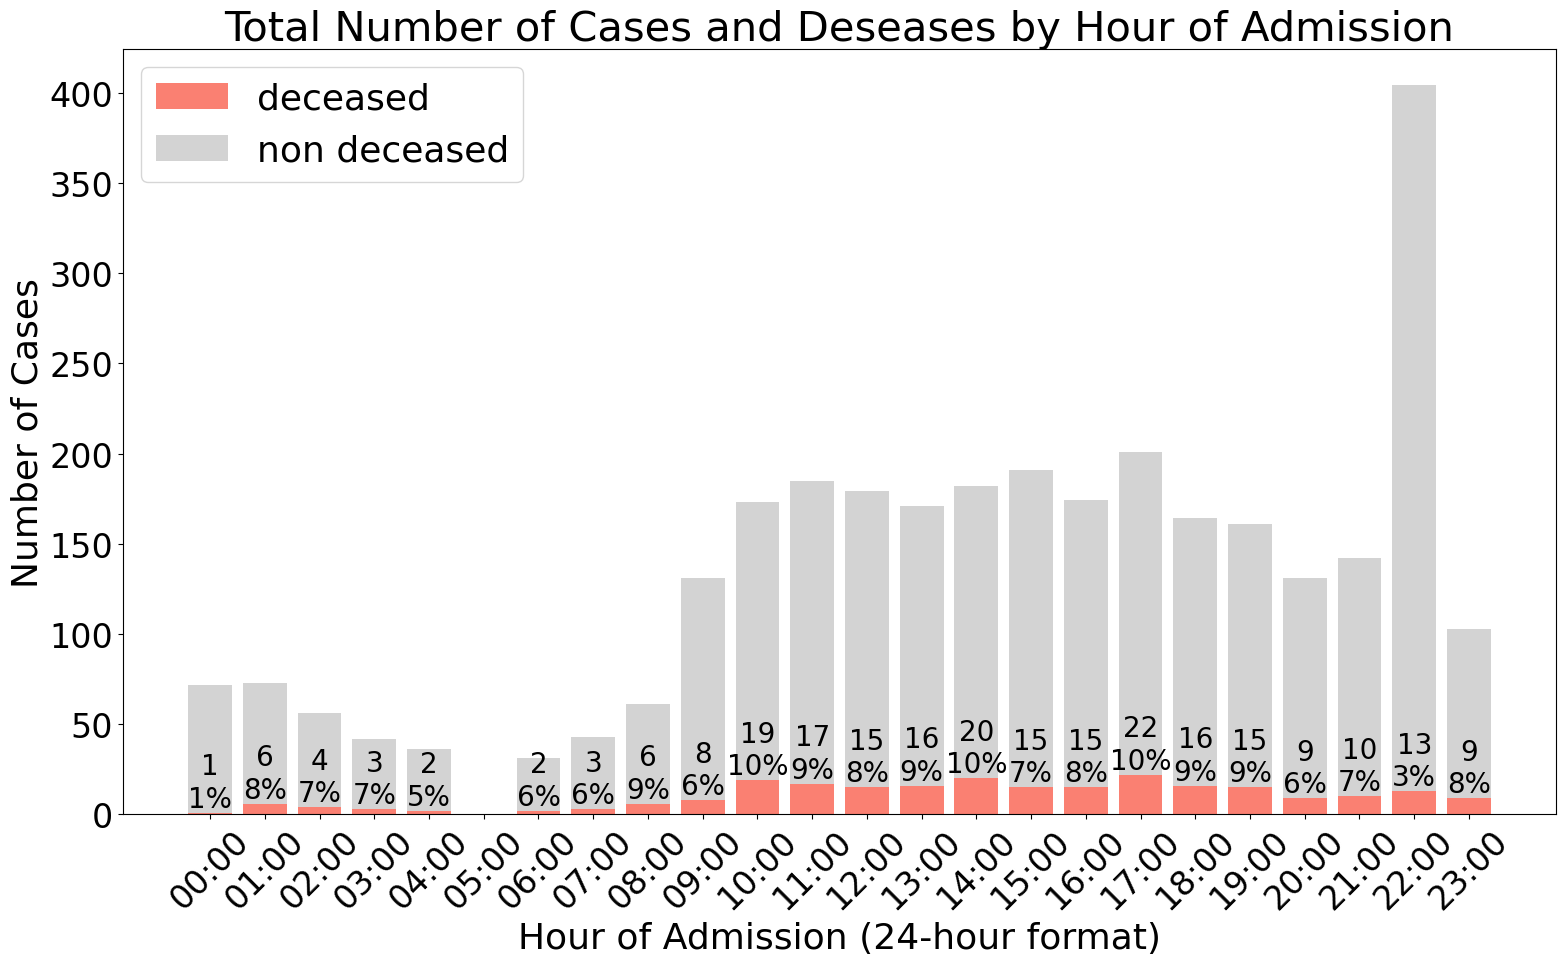

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Increase the default font size
plt.rcParams.update({'font.size': 18})

# Calculando a contagem de OBITO para cada categoria de COD ACTO
dia_counts = df.groupby("urg_data_hora_admissao_hora")["OBITO"].value_counts().unstack().fillna(0)

# Calculando o total de casos por categoria de COD ACTO
total_counts = dia_counts.sum(axis=1)

# Filtrando apenas categorias onde há pelo menos 1 óbito
mask = (dia_counts[1] >= 1) 
dia_counts = dia_counts[mask]
total_counts = total_counts[mask]

# Ensure all hours are present
all_hours = pd.DataFrame(index=range(24))
dia_counts = dia_counts.reindex(all_hours.index, fill_value=0)
total_counts = total_counts.reindex(all_hours.index, fill_value=0)

# Assegurando que o índice é numérico e ordenando
dia_counts.index = pd.to_numeric(dia_counts.index)
dia_counts = dia_counts.sort_index()
total_counts = total_counts.sort_index()

# Plotando o gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(16, 10))

# Criando um array de posições para as barras
x = np.arange(len(dia_counts))

# Plotando os casos de OBITO
dia_bars = ax.bar(x, dia_counts[1], color='salmon', label='deceased')

# Plotando o total de casos (casos não-óbito)
non_dia_bars = ax.bar(x, dia_counts[0], bottom=dia_counts[1], color='lightgrey', label='non deceased')

# Adicionando os números e percentagens acima das barras
for i, (idx, row) in enumerate(dia_counts.iterrows()):
    total_height = total_counts[idx]
    dia_height = row[1]
    if total_height > 0:
        percentage = int((dia_height / total_height) * 100)
        ax.text(i, dia_height, f'{int(dia_height)}\n{percentage}%', 
                ha='center', va='bottom', color='black', fontsize=20)

# Configurando o título e os rótulos dos eixos
ax.set_title('Total Number of Cases and Deseases by Hour of Admission', fontsize=30)
ax.set_xlabel("Hour of Admission (24-hour format)", fontsize=26)
ax.set_ylabel('Number of Cases', fontsize=26)
ax.legend(fontsize=26)

# Configurando os ticks do eixo x
ax.set_xticks(x)
ax.set_xticklabels([f'{h:02d}:00' for h in dia_counts.index], fontsize=24, rotation=45)

plt.yticks(fontsize=24)

# Ajustando o layout e mostrando o gráfico
plt.tight_layout()
plt.show()

In [ ]:
df["ORDEM PBASE DESC"].value_counts()

ORDEM PBASE DESC
1.760296    1238
1.000000     825
2.000000     742
3.000000     294
4.000000      25
5.000000       5
6.000000       3
Name: count, dtype: int64

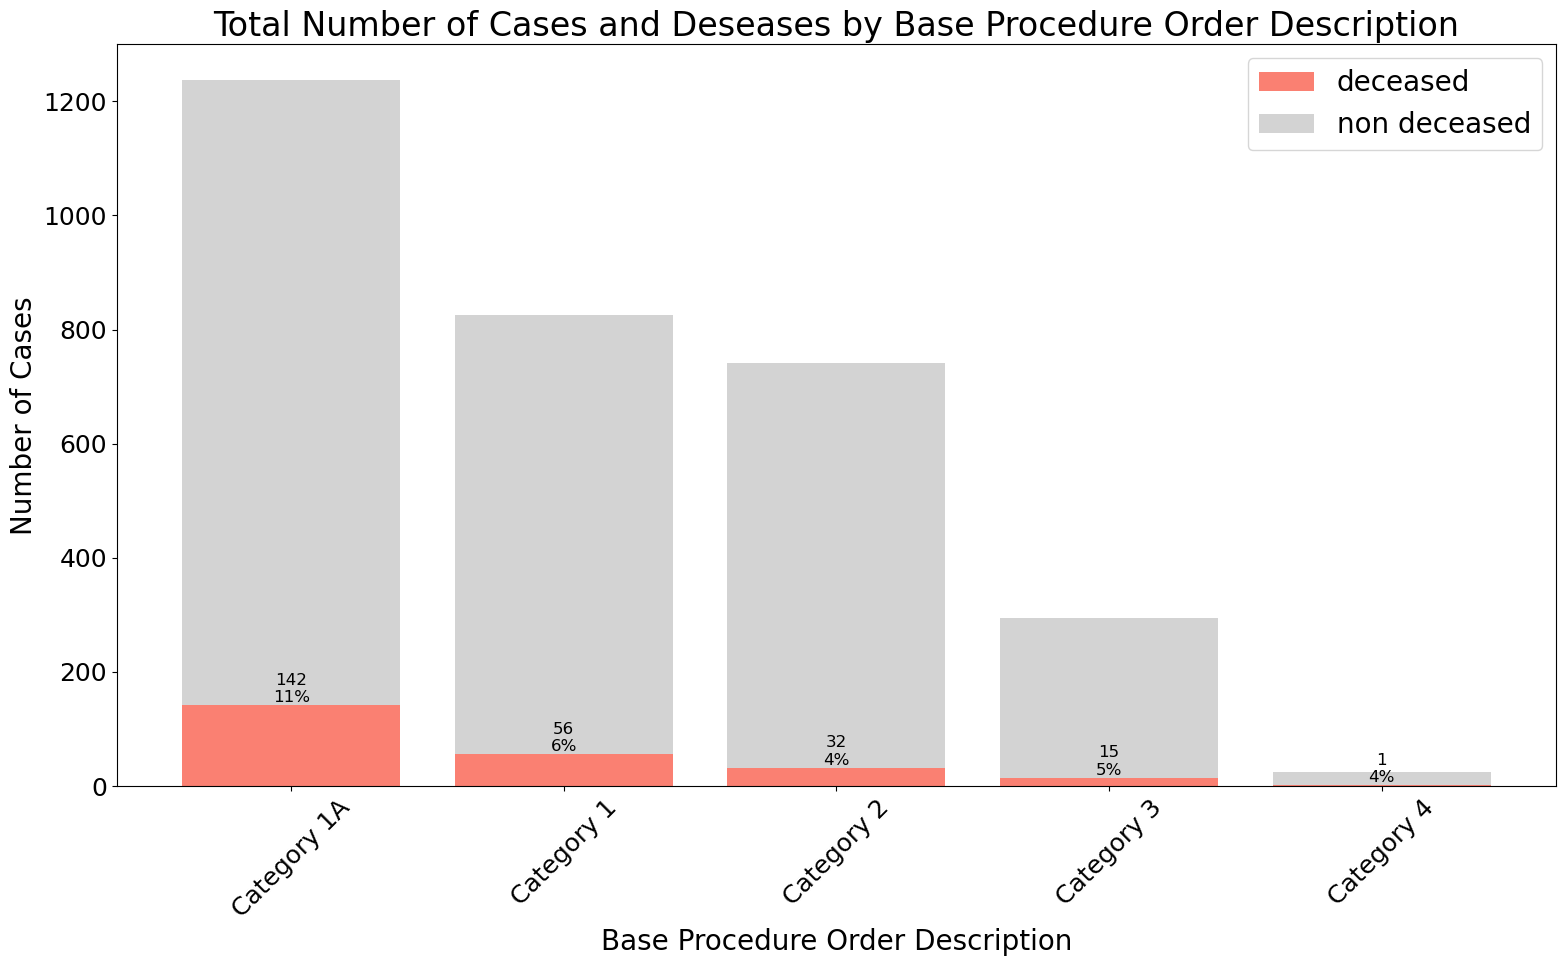

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Increase the default font size
plt.rcParams.update({'font.size': 18})

# Assuming df is your DataFrame
# Calculando a contagem de OBITO para cada categoria de ORDEM PBASE DESC
dia_counts = df.groupby("ORDEM PBASE DESC")["OBITO"].value_counts().unstack().fillna(0)

# Calculando o total de casos por categoria de ORDEM PBASE DESC
total_counts = dia_counts.sum(axis=1)

# Filtrando apenas categorias onde há pelo menos 1 óbito
mask = (dia_counts[1] >= 1)
dia_counts = dia_counts[mask]
total_counts = total_counts[mask]

# Assegurando que o índice é numérico e ordenando
dia_counts.index = pd.to_numeric(dia_counts.index)
total_counts.index = pd.to_numeric(total_counts.index)

# Definindo o mapeamento de rótulos
label_mapping = {
    1.7602956705385429: 'Category 1A',
    1.000000: 'Category 1',
    2.000000: 'Category 2',
    3.000000: 'Category 3',
    4.000000: 'Category 4',
    5.000000: 'Category 5',
    6.000000: 'Category 6'
}

# Ordenando os índices para garantir a ordem correta das categorias
dia_counts = dia_counts.loc[sorted(dia_counts.index, key=lambda x: (x != 1.7602956705385429, x))]
total_counts = total_counts.loc[sorted(total_counts.index, key=lambda x: (x != 1.7602956705385429, x))]

# Criando rótulos para o eixo x
x_labels = [label_mapping[idx] for idx in dia_counts.index]

# Plotando o gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(16, 10))

# Criando um array de posições para as barras
x = np.arange(len(dia_counts))

# Plotando os casos de OBITO
dia_bars = ax.bar(x, dia_counts[1], color='salmon', label='deceased')

# Plotando o total de casos (casos não-óbito)
non_dia_bars = ax.bar(x, dia_counts[0], bottom=dia_counts[1], color='lightgrey', label='non deceased')

# Adicionando os números e percentagens acima das barras de óbito
for i, (idx, row) in enumerate(dia_counts.iterrows()):
    total_height = total_counts[idx]
    dia_height = row[1]
    if total_height > 0:
        percentage = int((dia_height / total_height) * 100)
        ax.text(i, dia_height, f'{int(dia_height)}\n{percentage}%', 
                ha='center', va='bottom', color='black', fontsize=12)

# Configurando o título e os rótulos dos eixos
ax.set_title('Total Number of Cases and Deseases by Base Procedure Order Description', fontsize=24)
ax.set_xlabel("Base Procedure Order Description", fontsize=20)
ax.set_ylabel('Number of Cases', fontsize=20)
ax.legend(fontsize=20)

# Configurando os ticks do eixo x com os novos rótulos
ax.set_xticks(x)
ax.set_xticklabels(x_labels, fontsize=18, rotation=45)

plt.yticks(fontsize=18)

# Ajustando o layout e mostrando o gráfico
plt.tight_layout()
plt.show()


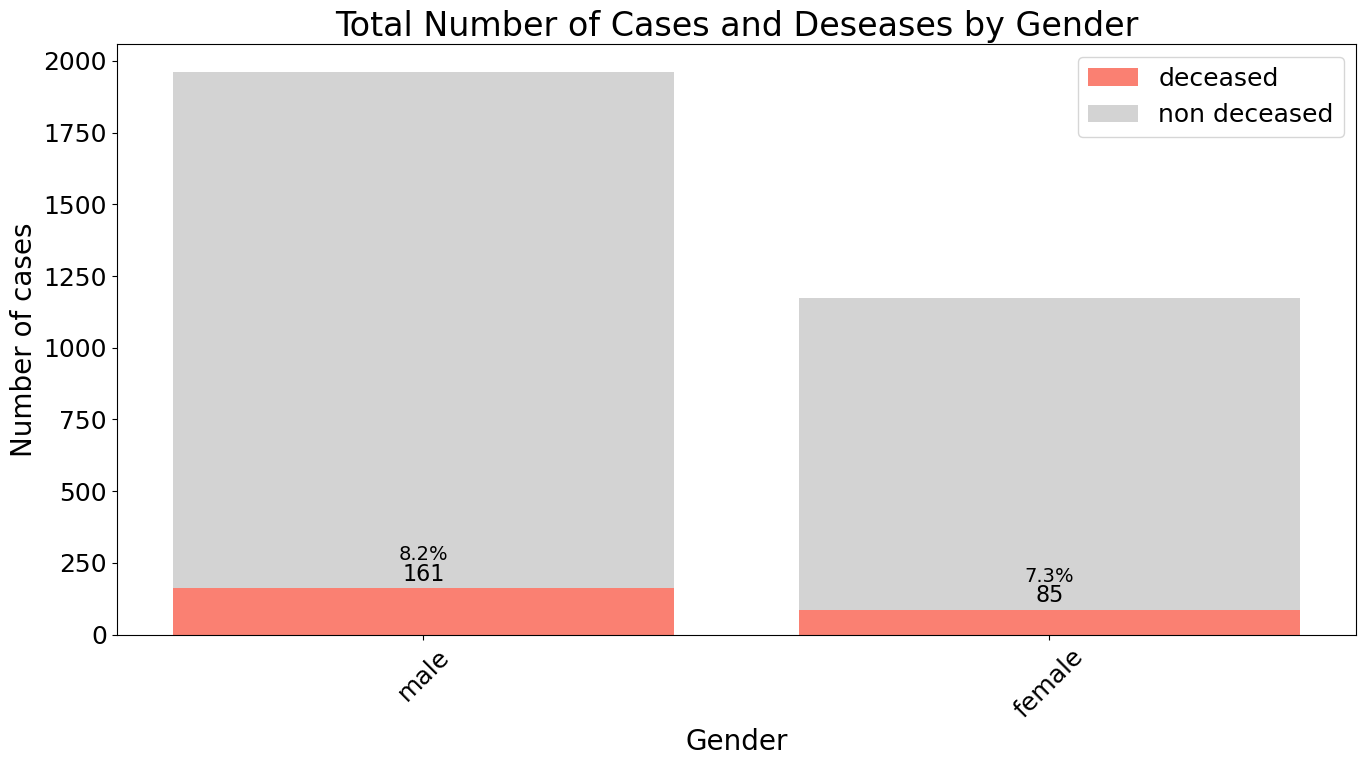

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 18})

# Converting SEXO values to 'female' and 'male'
df.loc[df['SEXO'] == 1, 'SEXO'] = 'female'
df.loc[df['SEXO'] == 2, 'SEXO'] = 'male'

# Calculating the count of OBITO for each category of SEXO
dia_counts = df.groupby("SEXO")["OBITO"].value_counts().unstack().fillna(0)

# Filtering categories where OBITO is different from 0
dia_counts = dia_counts[dia_counts[1] > 0]

# Calculating the total number of cases per SEXO category
total_counts = dia_counts.sum(axis=1)

# Sorting by the total number of cases in descending order
sorted_indices = total_counts.sort_values(ascending=False).index
dia_counts = dia_counts.loc[sorted_indices]
total_counts = total_counts.loc[sorted_indices]

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# Plotting OBITO cases
dia_bars = ax.bar(dia_counts.index, dia_counts[1], color='salmon', label='deceased')
dia_counts['Percentual de Óbito'] = dia_counts[1] / total_counts * 100

# Plotting total cases (non-OBITO cases)
non_dia_bars = ax.bar(dia_counts.index, dia_counts[0], bottom=dia_counts[1], color='lightgrey', label='non deceased')

# Adding numbers above the bars
for idx in range(len(dia_counts)):
    total_height = total_counts.iloc[idx]
    dia_height = dia_counts.iloc[idx][1]
    percentual_obito = dia_counts.iloc[idx]['Percentual de Óbito']
    
    ax.text(dia_counts.index[idx], dia_height + 10, f"{int(dia_height)}", ha='center', va='bottom', color='black', fontsize=16)
    ax.text(dia_counts.index[idx], dia_height + 85, f"{percentual_obito:.1f}%", ha='center', va='bottom', color='black', fontsize=14)    

# Configuring the title and axis labels with increased font size
ax.set_title('Total Number of Cases and Deseases by Gender', fontsize=24)
ax.set_xlabel("Gender", fontsize=20)
ax.set_ylabel('Number of cases', fontsize=20)
ax.legend(fontsize=18)

# Rotating the x-axis labels for better visualization
plt.xticks(rotation=45, fontsize=18)
plt.yticks(fontsize=18)

# Adjusting the layout and displaying the plot
plt.tight_layout()
plt.show()


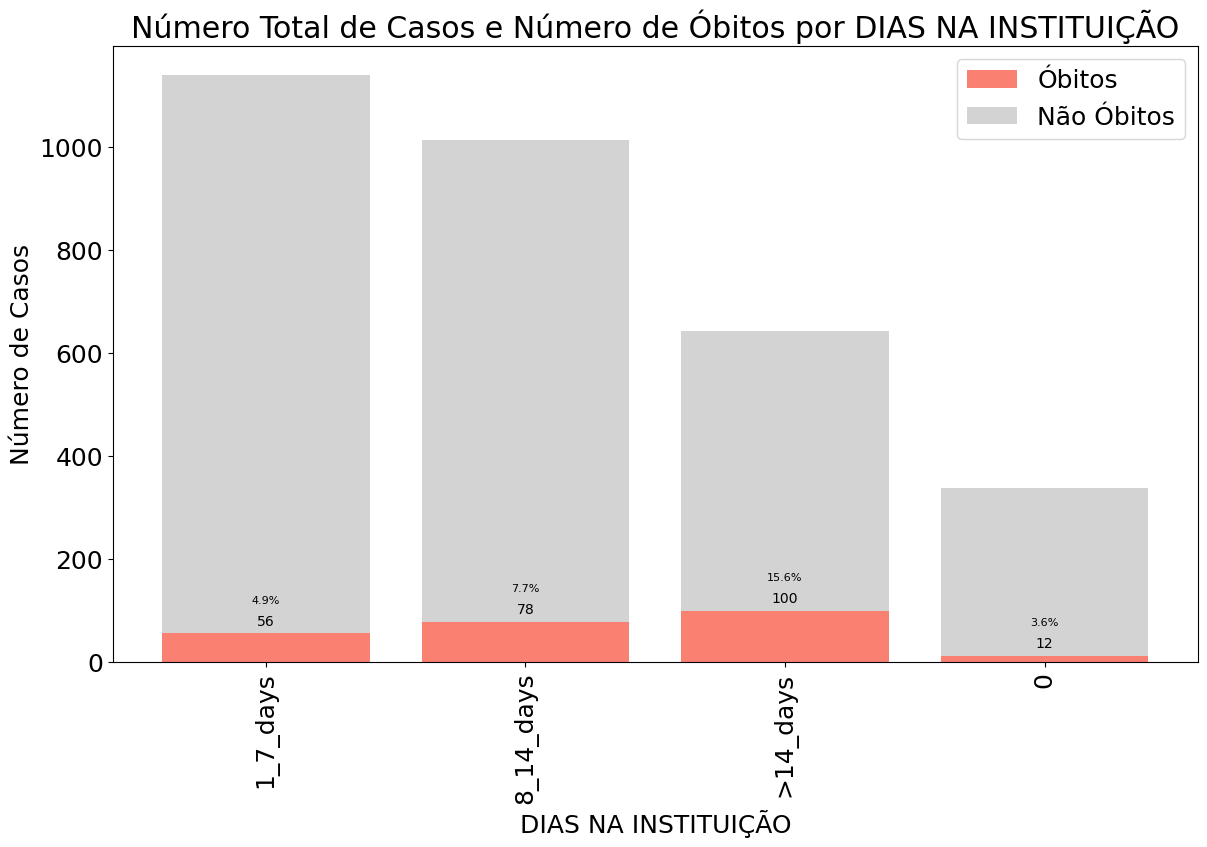

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

import pandas as pd

# Definir os limites das categorias
limits = [0,1,8,14,1000]

# Definir os rótulos das categorias
labels = ["0","1_7_days",'8_14_days','>14_days']

# Criar a coluna com as categorias
df["DIAS NA INSTITUCAO_CATEGORIA"] = pd.cut(df["DIAS NA INSTITUICAO"], bins=limits, labels=labels, right=False)

# Calculando a contagem de OBITO para cada categoria de COD DIAGNOSTICO
dia_counts = df.groupby("DIAS NA INSTITUCAO_CATEGORIA")["OBITO"].value_counts().unstack().fillna(0)

# Filtrando apenas categorias onde OBITO é diferente de 0
dia_counts = dia_counts[dia_counts[1] > 0]

# Calculando o total de casos por categoria de COD DIAGNOSTICO
total_counts = dia_counts.sum(axis=1)

# Ordenando por número total de casos em ordem decrescente
sorted_indices = total_counts.sort_values(ascending=False).index
dia_counts = dia_counts.loc[sorted_indices]
total_counts = total_counts.loc[sorted_indices]

# Plotando o gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(14, 8))

# Plotando os casos de OBITO
dia_bars = ax.bar(dia_counts.index, dia_counts[1], color='salmon', label='Óbitos')
dia_counts['Percentual de Óbito'] = dia_counts[1] / total_counts * 100
# Plotando o total de casos (casos não-óbito)
non_dia_bars = ax.bar(dia_counts.index, dia_counts[0], bottom=dia_counts[1], color='lightgrey', label='Não Óbitos')

# Adicionando os números acima das barras
for idx in range(len(dia_counts)):
    total_height = total_counts.iloc[idx]
    dia_height = dia_counts.iloc[idx][1]
    percentual_obito = dia_counts.iloc[idx]['Percentual de Óbito']
    
    ax.text(dia_counts.index[idx], dia_height + 10, f"{int(dia_height)}", ha='center', va='bottom', color='black', fontsize=10)
    ax.text(dia_counts.index[idx], dia_height + 55, f"{percentual_obito:.1f}%", ha='center', va='bottom', color='black', fontsize=8)    

# Configurando o título e os rótulos dos eixos
ax.set_title('Número Total de Casos e Número de Óbitos por DIAS NA INSTITUIÇÃO')
ax.set_xlabel("DIAS NA INSTITUIÇÃO")
ax.set_ylabel('Número de Casos')
ax.legend()

# Rotacionando os rótulos do eixo x para melhor visualização
plt.xticks(rotation=90)

plt.show()

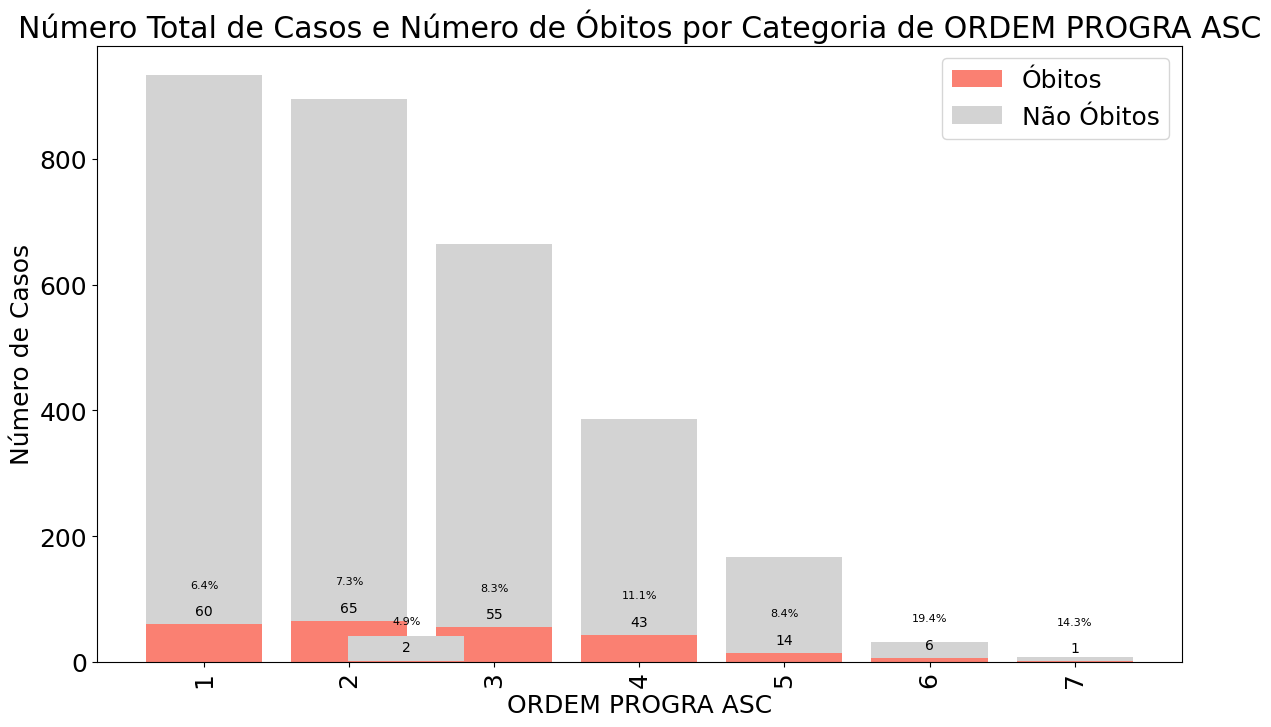

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


import pandas as pd
import matplotlib.pyplot as plt

# Calculando a contagem de OBITO para cada categoria de COD DIAGNOSTICO
dia_counts = df.groupby("ORDEM PROGRA ASC")["OBITO"].value_counts().unstack().fillna(0)

# Filtrando apenas categorias onde OBITO é diferente de 0
dia_counts = dia_counts[dia_counts[1] > 0]

# Calculando o total de casos por categoria de COD DIAGNOSTICO
total_counts = dia_counts.sum(axis=1)

# Ordenando por número total de casos em ordem decrescente
sorted_indices = total_counts.sort_values(ascending=False).index
dia_counts = dia_counts.loc[sorted_indices]
total_counts = total_counts.loc[sorted_indices]

# Plotando o gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(14, 8))

# Plotando os casos de OBITO
dia_bars = ax.bar(dia_counts.index, dia_counts[1], color='salmon', label='Óbitos')
dia_counts['Percentual de Óbito'] = dia_counts[1] / total_counts * 100
# Plotando o total de casos (casos não-óbito)
non_dia_bars = ax.bar(dia_counts.index, dia_counts[0], bottom=dia_counts[1], color='lightgrey', label='Não Óbitos')

# Adicionando os números acima das barras
for idx in range(len(dia_counts)):
    total_height = total_counts.iloc[idx]
    dia_height = dia_counts.iloc[idx][1]
    percentual_obito = dia_counts.iloc[idx]['Percentual de Óbito']
    
    ax.text(dia_counts.index[idx], dia_height + 10, f"{int(dia_height)}", ha='center', va='bottom', color='black', fontsize=10)
    ax.text(dia_counts.index[idx], dia_height + 55, f"{percentual_obito:.1f}%", ha='center', va='bottom', color='black', fontsize=8)    

# Configurando o título e os rótulos dos eixos
ax.set_title('Número Total de Casos e Número de Óbitos por Categoria de ORDEM PROGRA ASC')
ax.set_xlabel("ORDEM PROGRA ASC")
ax.set_ylabel('Número de Casos')
ax.legend()

# Rotacionando os rótulos do eixo x para melhor visualização
plt.xticks(rotation=90)

plt.show()


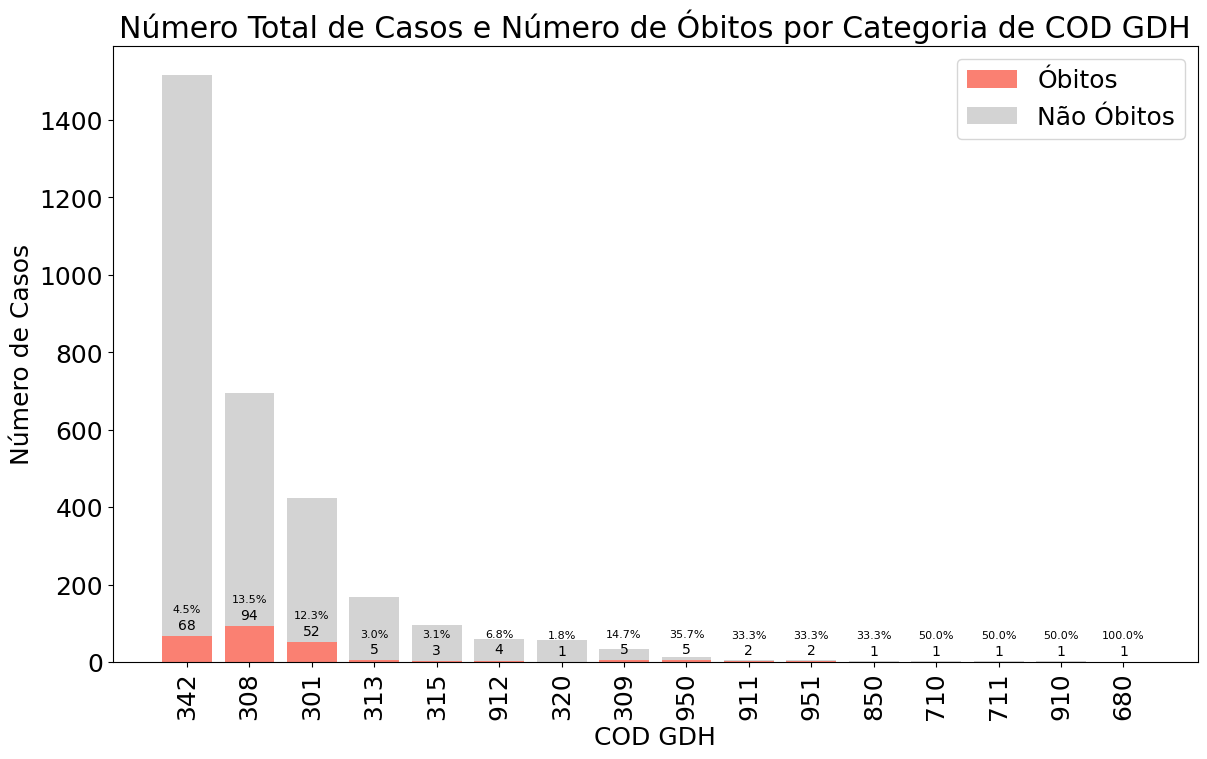

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertendo a coluna "COD GDH" para inteiro
df["COD GDH"] = df["COD GDH"].astype(int)
df["COD GDH"] = df["COD GDH"].astype(str)
# Calculando a contagem de OBITO para cada categoria de COD DIAGNOSTICO
dia_counts = df.groupby("COD GDH")["OBITO"].value_counts().unstack().fillna(0)

# Filtrando apenas categorias onde OBITO é diferente de 0
dia_counts = dia_counts[dia_counts[1] > 0]

# Calculando o total de casos por categoria de COD DIAGNOSTICO
total_counts = dia_counts.sum(axis=1)

# Ordenando por número total de casos em ordem decrescente
sorted_indices = total_counts.sort_values(ascending=False).index
dia_counts = dia_counts.loc[sorted_indices]
total_counts = total_counts.loc[sorted_indices]

# Selecionando apenas os top 30
top_30_indices = sorted_indices[:30]
dia_counts = dia_counts.loc[top_30_indices]
total_counts = total_counts.loc[top_30_indices]

# Plotando o gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(14, 8))

# Plotando os casos de OBITO
dia_bars = ax.bar(dia_counts.index, dia_counts[1], color='salmon', label='Óbitos')
dia_counts['Percentual de Óbito'] = dia_counts[1] / total_counts * 100
# Plotando o total de casos (casos não-óbito)
non_dia_bars = ax.bar(dia_counts.index, dia_counts[0], bottom=dia_counts[1], color='lightgrey', label='Não Óbitos')

# Adicionando os números acima das barras
for idx in range(len(dia_counts)):
    total_height = total_counts.iloc[idx]
    dia_height = dia_counts.iloc[idx][1]
    percentual_obito = dia_counts.iloc[idx]['Percentual de Óbito']
    
    ax.text(dia_counts.index[idx], dia_height + 10, f"{int(dia_height)}", ha='center', va='bottom', color='black', fontsize=10)
    ax.text(dia_counts.index[idx], dia_height + 55, f"{percentual_obito:.1f}%", ha='center', va='bottom', color='black', fontsize=8)    

# Configurando o título e os rótulos dos eixos
ax.set_title('Número Total de Casos e Número de Óbitos por Categoria de COD GDH')
ax.set_xlabel("COD GDH")
ax.set_ylabel('Número de Casos')
ax.legend()

# Rotacionando os rótulos do eixo x para melhor visualização
plt.xticks(rotation=90)

plt.show()


In [ ]:
dia_counts

OBITO         0     1  Percentual de Óbito
COD GDH                                   
342      1447.0  68.0             4.488449
308       602.0  94.0            13.505747
301       372.0  52.0            12.264151
313       162.0   5.0             2.994012
315        94.0   3.0             3.092784
912        55.0   4.0             6.779661
320        55.0   1.0             1.785714
309        29.0   5.0            14.705882
950         9.0   5.0            35.714286
911         4.0   2.0            33.333333
951         4.0   2.0            33.333333
850         2.0   1.0            33.333333
710         1.0   1.0            50.000000
711         1.0   1.0            50.000000
910         1.0   1.0            50.000000
680         0.0   1.0           100.000000

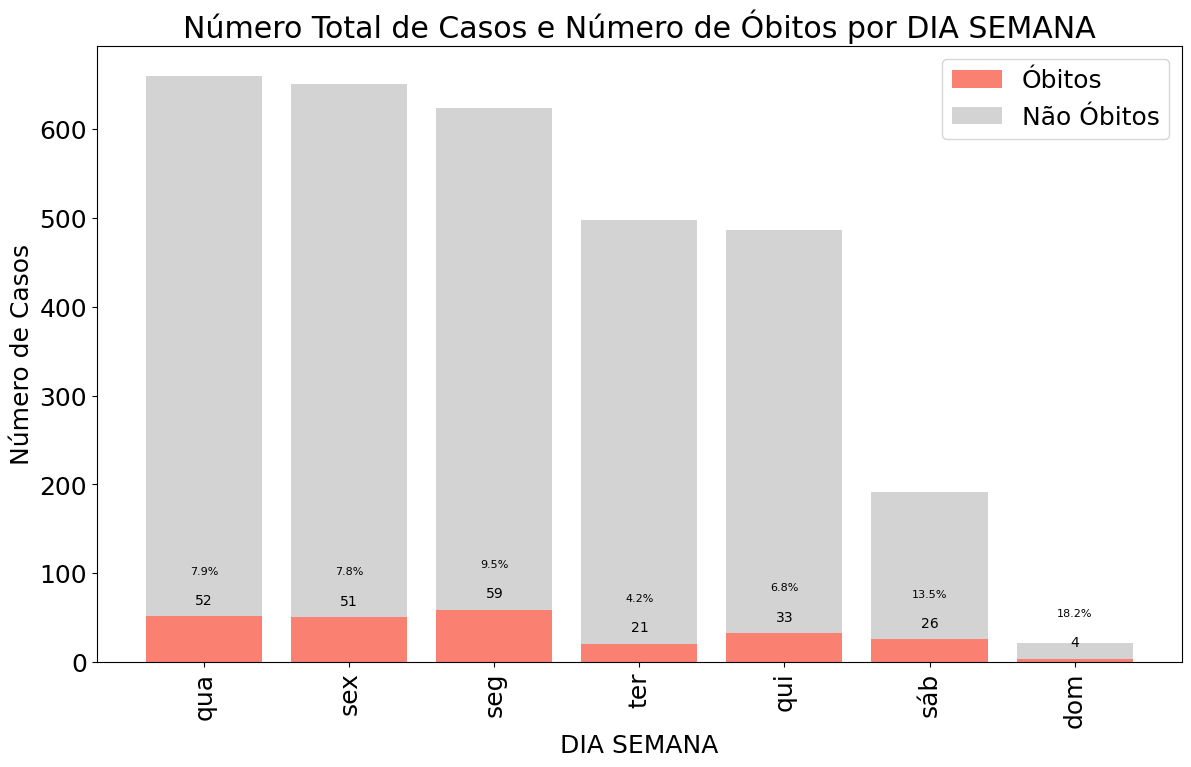

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


import pandas as pd
import matplotlib.pyplot as plt

# Calculando a contagem de OBITO para cada categoria de COD DIAGNOSTICO
dia_counts = df.groupby("DIA SEM")["OBITO"].value_counts().unstack().fillna(0)

# Filtrando apenas categorias onde OBITO é diferente de 0
dia_counts = dia_counts[dia_counts[1] > 0]

# Calculando o total de casos por categoria de COD DIAGNOSTICO
total_counts = dia_counts.sum(axis=1)

# Ordenando por número total de casos em ordem decrescente
sorted_indices = total_counts.sort_values(ascending=False).index
dia_counts = dia_counts.loc[sorted_indices]
total_counts = total_counts.loc[sorted_indices]

# Plotando o gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(14, 8))

# Plotando os casos de OBITO
dia_bars = ax.bar(dia_counts.index, dia_counts[1], color='salmon', label='Óbitos')
dia_counts['Percentual de Óbito'] = dia_counts[1] / total_counts * 100
# Plotando o total de casos (casos não-óbito)
non_dia_bars = ax.bar(dia_counts.index, dia_counts[0], bottom=dia_counts[1], color='lightgrey', label='Não Óbitos')

# Adicionando os números acima das barras
for idx in range(len(dia_counts)):
    total_height = total_counts.iloc[idx]
    dia_height = dia_counts.iloc[idx][1]
    percentual_obito = dia_counts.iloc[idx]['Percentual de Óbito']
    
    ax.text(dia_counts.index[idx], dia_height + 10, f"{int(dia_height)}", ha='center', va='bottom', color='black', fontsize=10)
    ax.text(dia_counts.index[idx], dia_height + 45, f"{percentual_obito:.1f}%", ha='center', va='bottom', color='black', fontsize=8)    
 

# Configurando o título e os rótulos dos eixos
ax.set_title('Número Total de Casos e Número de Óbitos por DIA SEMANA')
ax.set_xlabel("DIA SEMANA")
ax.set_ylabel('Número de Casos')
ax.legend()

# Rotacionando os rótulos do eixo x para melhor visualização
plt.xticks(rotation=90)

plt.show()


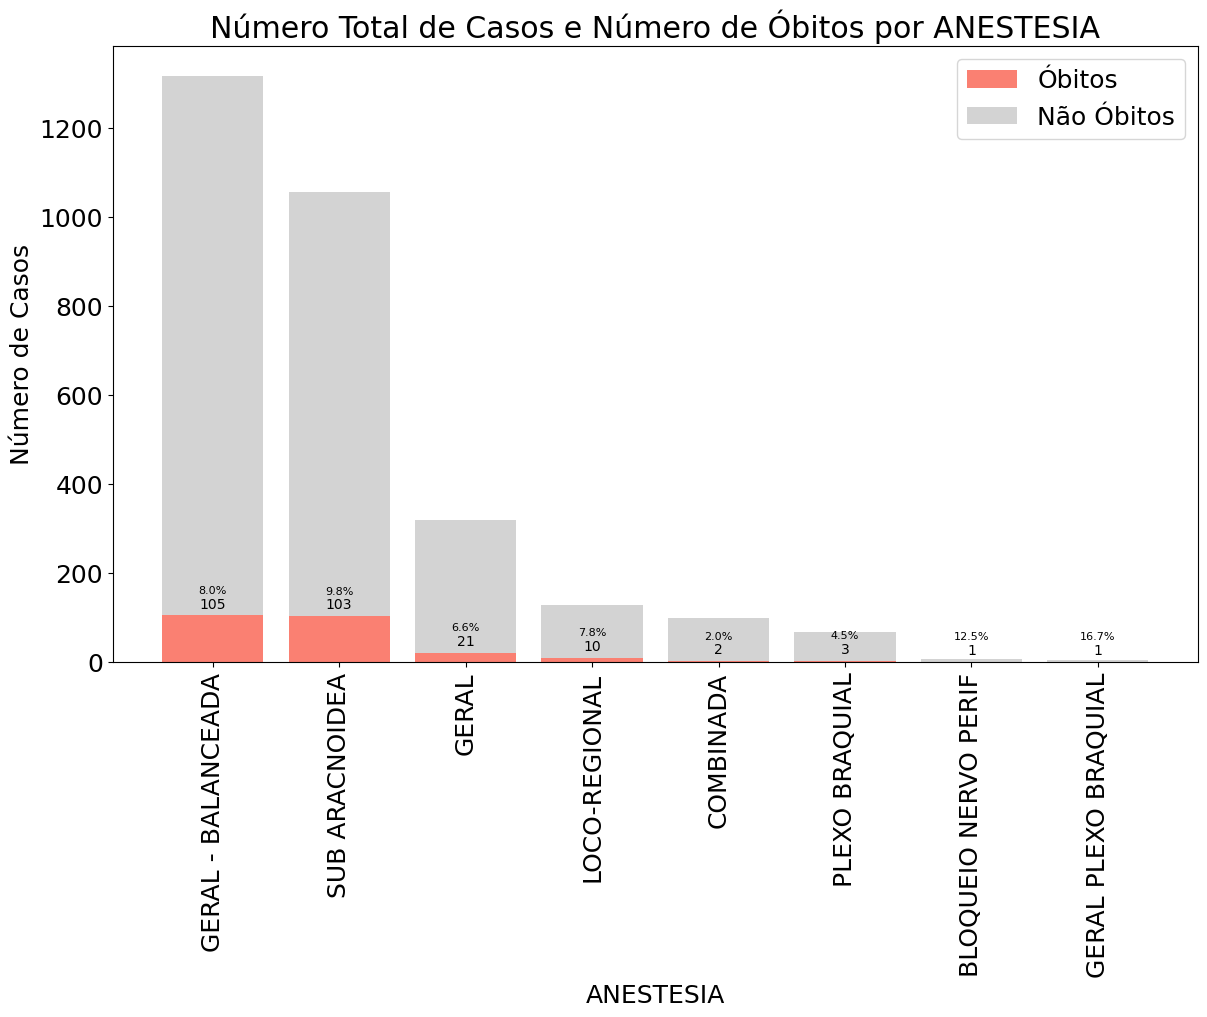

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


import pandas as pd
import matplotlib.pyplot as plt

# Calculando a contagem de OBITO para cada categoria de COD DIAGNOSTICO
dia_counts = df.groupby("ANESTESIA")["OBITO"].value_counts().unstack().fillna(0)

# Filtrando apenas categorias onde OBITO é diferente de 0
dia_counts = dia_counts[dia_counts[1] > 0]

# Calculando o total de casos por categoria de COD DIAGNOSTICO
total_counts = dia_counts.sum(axis=1)

# Ordenando por número total de casos em ordem decrescente
sorted_indices = total_counts.sort_values(ascending=False).index
dia_counts = dia_counts.loc[sorted_indices]
total_counts = total_counts.loc[sorted_indices]

# Plotando o gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(14, 8))

# Plotando os casos de OBITO
dia_bars = ax.bar(dia_counts.index, dia_counts[1], color='salmon', label='Óbitos')
dia_counts['Percentual de Óbito'] = dia_counts[1] / total_counts * 100
# Plotando o total de casos (casos não-óbito)
non_dia_bars = ax.bar(dia_counts.index, dia_counts[0], bottom=dia_counts[1], color='lightgrey', label='Não Óbitos')

# Adicionando os números acima das barras
for idx in range(len(dia_counts)):
    total_height = total_counts.iloc[idx]
    dia_height = dia_counts.iloc[idx][1]
    percentual_obito = dia_counts.iloc[idx]['Percentual de Óbito']
    
    ax.text(dia_counts.index[idx], dia_height + 10, f"{int(dia_height)}", ha='center', va='bottom', color='black', fontsize=10)
    ax.text(dia_counts.index[idx], dia_height + 45, f"{percentual_obito:.1f}%", ha='center', va='bottom', color='black', fontsize=8)    

# Configurando o título e os rótulos dos eixos
ax.set_title('Número Total de Casos e Número de Óbitos por ANESTESIA')
ax.set_xlabel("ANESTESIA")
ax.set_ylabel('Número de Casos')
ax.legend()

# Rotacionando os rótulos do eixo x para melhor visualização
plt.xticks(rotation=90)

plt.show()

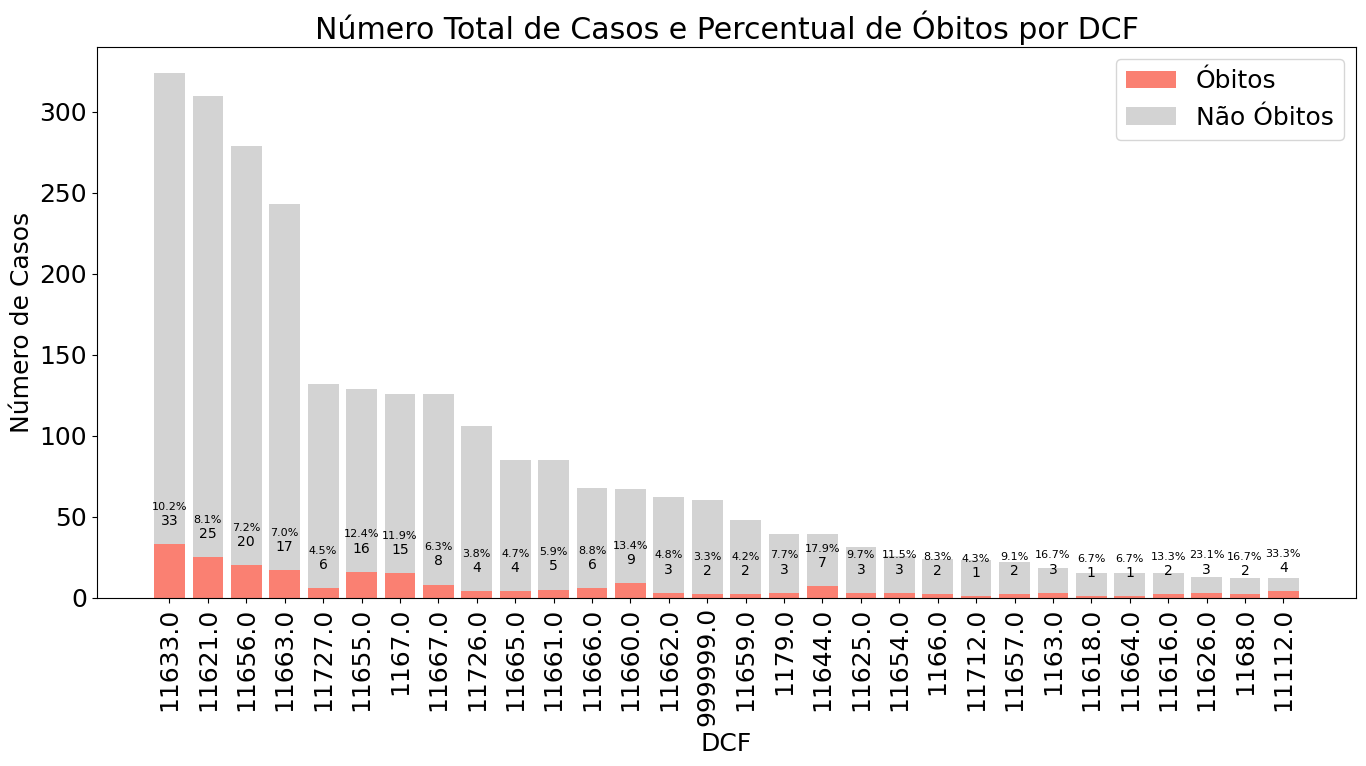

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertendo a coluna "DCF" para string (se já não estiver)
df["DCF"] = df["DCF"].astype(str)

# Calculando a contagem de OBITO para cada categoria de DCF
dia_counts = df.groupby("DCF")["OBITO"].value_counts().unstack().fillna(0)

# Filtrando apenas categorias onde OBITO é diferente de 0
dia_counts = dia_counts[dia_counts[1] > 0]

# Calculando o total de casos por categoria de DCF
total_counts = dia_counts.sum(axis=1)

# Ordenando por número total de casos em ordem decrescente
sorted_indices = total_counts.sort_values(ascending=False).index
dia_counts = dia_counts.loc[sorted_indices]
total_counts = total_counts.loc[sorted_indices]

# Selecionando apenas os top 30
top_30_indices = sorted_indices[:30]
dia_counts = dia_counts.loc[top_30_indices]
total_counts = total_counts.loc[top_30_indices]

# Calculando a porcentagem de óbitos
dia_counts['Percentual de Óbito'] = dia_counts[1] / total_counts * 100

# Plotando o gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(14, 8))

# Plotando os casos de OBITO
dia_bars = ax.bar(dia_counts.index, dia_counts[1], color='salmon', label='Óbitos')

# Plotando o total de casos (casos não-óbito)
non_dia_bars = ax.bar(dia_counts.index, dia_counts[0], bottom=dia_counts[1], color='lightgrey', label='Não Óbitos')

# Adicionando os números de óbitos e porcentagens acima das barras
for idx in range(len(dia_counts)):
    dia_height = dia_counts.iloc[idx][1]
    percentual_obito = dia_counts.iloc[idx]['Percentual de Óbito']
    
    ax.text(dia_counts.index[idx], dia_height + 10, f"{int(dia_height)}", ha='center', va='bottom', color='black', fontsize=10)
    ax.text(dia_counts.index[idx], dia_height + 20, f"{percentual_obito:.1f}%", ha='center', va='bottom', color='black', fontsize=8)

# Configurando o título e os rótulos dos eixos
ax.set_title('Número Total de Casos e Percentual de Óbitos por DCF')
ax.set_xlabel("DCF")
ax.set_ylabel('Número de Casos')
ax.legend()

# Rotacionando os rótulos do eixo x para melhor visualização
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


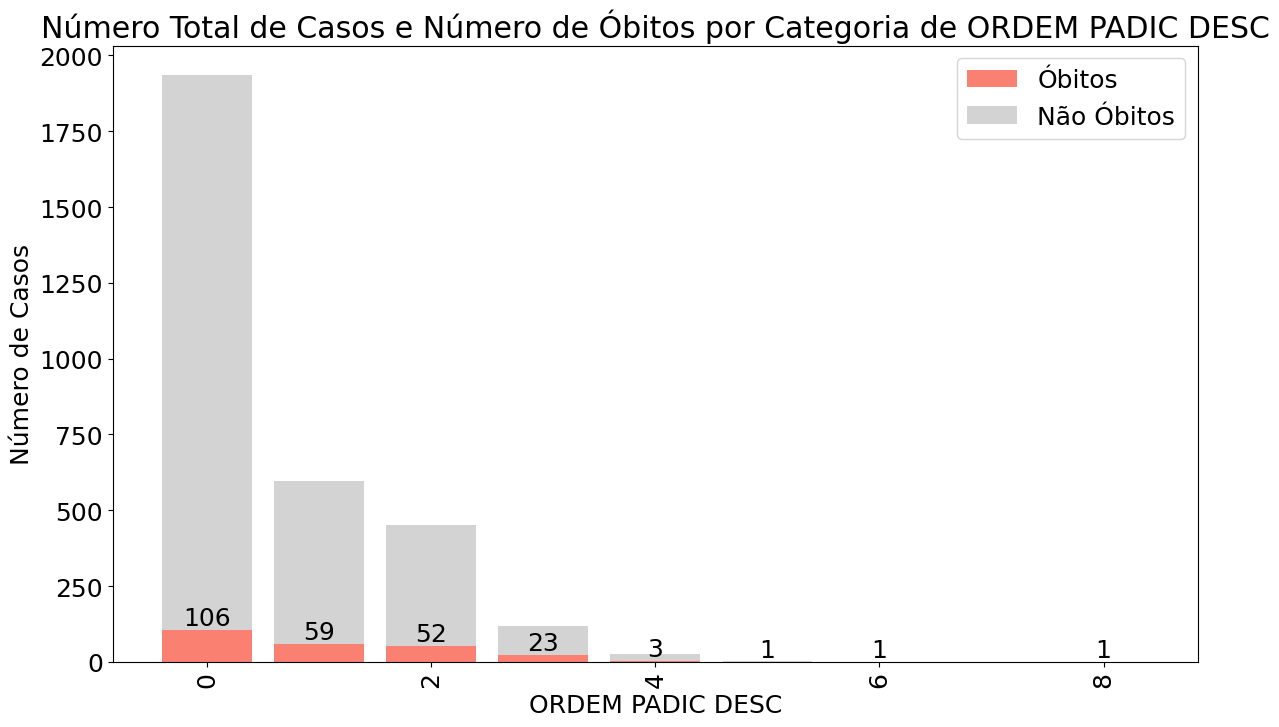

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


import pandas as pd
import matplotlib.pyplot as plt

# Calculando a contagem de OBITO para cada categoria de COD DIAGNOSTICO
dia_counts = df.groupby("ORDEM PADIC DESC")["OBITO"].value_counts().unstack().fillna(0)

# Filtrando apenas categorias onde OBITO é diferente de 0
dia_counts = dia_counts[dia_counts[1] > 0]

# Calculando o total de casos por categoria de COD DIAGNOSTICO
total_counts = dia_counts.sum(axis=1)

# Ordenando por número total de casos em ordem decrescente
sorted_indices = total_counts.sort_values(ascending=False).index
dia_counts = dia_counts.loc[sorted_indices]
total_counts = total_counts.loc[sorted_indices]

# Plotando o gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(14, 8))

# Plotando os casos de OBITO
dia_bars = ax.bar(dia_counts.index, dia_counts[1], color='salmon', label='Óbitos')

# Plotando o total de casos (casos não-óbito)
non_dia_bars = ax.bar(dia_counts.index, dia_counts[0], bottom=dia_counts[1], color='lightgrey', label='Não Óbitos')

# Adicionando os números acima das barras
for idx in range(len(dia_counts)):
    total_height = total_counts.iloc[idx]
    dia_height = dia_counts.iloc[idx][1]
    
  
    #ax.text(dia_counts.index[idx], total_height, int(total_height), ha='center', va='bottom')
    ax.text(dia_counts.index[idx], dia_height, int(dia_height), ha='center', va='bottom', color='black')

# Configurando o título e os rótulos dos eixos
ax.set_title('Número Total de Casos e Número de Óbitos por Categoria de ORDEM PADIC DESC')
ax.set_xlabel("ORDEM PADIC DESC")
ax.set_ylabel('Número de Casos')
ax.legend()

# Rotacionando os rótulos do eixo x para melhor visualização
plt.xticks(rotation=90)

plt.show()


In [ ]:
import pandas as pd

# Definir os limites das categorias
limits = [0,1,8,15,1000]

# Definir os rótulos das categorias
labels = ["0","1_7_days",'8_14_days','>14_days']

# Criar a coluna com as categorias
df["DIAS NA INSTITUICAO_CATEGORIA"] = pd.cut(df["DIAS NA INSTITUICAO"], bins=limits, labels=labels, right=False)

In [ ]:
df["DIAS NA INSTITUICAO_CATEGORIA"].value_counts()

DIAS NA INSTITUICAO_CATEGORIA
1_7_days     1138
8_14_days    1092
>14_days      564
0             338
Name: count, dtype: int64

In [ ]:
import numpy as np
labels = ["0","1_7_days",'8_14_days','>14_days']
conditions = [
    df["DIAS NA INSTITUICAO_CATEGORIA"] == '0',
    df["DIAS NA INSTITUICAO_CATEGORIA"] == "1_7_days",
    df["DIAS NA INSTITUICAO_CATEGORIA"] == '8_14_days',
    df["DIAS NA INSTITUICAO_CATEGORIA"] == '>14_days',
]

choices = [0,1, 2,3]

df["DIAS NA INSTITUICAO_label"] = np.select(conditions, choices)

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr, chi2_contingency
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Assume df is your DataFrame
# Separando colunas numéricas e categóricas, excluindo certas colunas
exclude_cols = ["DIAS NA INSTITUICAO_label","DIAS NA INSTITUICAO_CATEGORIA", "INT DES DESTINO", "DTA OBITO", "DIAS NA INSTITUICAO", "OBITO", "DIAS NA INSTITUICAO_label", "DIAS NA INSTITUICAO_CATEGORIA"]
numerical_cols = df.select_dtypes(include=[np.number]).columns.difference(exclude_cols)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.difference(exclude_cols)

# Criando cópias das colunas relevantes para não alterar o DataFrame original
numerical_data = df[numerical_cols].copy()
categorical_data = df[categorical_cols].copy()

# Imputação (caso ainda não tenha sido feita)
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

numerical_data = num_imputer.fit_transform(numerical_data)
categorical_data = cat_imputer.fit_transform(categorical_data)

# Convertendo todas as colunas categóricas para strings para garantir a uniformidade
categorical_data = pd.DataFrame(categorical_data, columns=categorical_cols).astype(str)

# Label Encoding para colunas categóricas
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    categorical_data[col] = le.fit_transform(categorical_data[col])
    label_encoders[col] = le

# Adicionando a coluna OBITO ao DataFrame temporário
temp_df = pd.DataFrame(numerical_data, columns=numerical_cols)
temp_df[categorical_cols] = categorical_data
temp_df["DIAS NA INSTITUICAO_label"] = df["DIAS NA INSTITUICAO_label"].values

# Calculando correlações para variáveis numéricas
correlation_results = {}
for col in numerical_cols:
    correlation, _ = pointbiserialr(temp_df["DIAS NA INSTITUICAO_label"], temp_df[col])
    correlation_results[col] = correlation

# Calculando correlações para variáveis categóricas
for col in categorical_cols:
    confusion_matrix = pd.crosstab(temp_df["DIAS NA INSTITUICAO_label"], temp_df[col]).to_numpy()
    correlation = cramers_v(confusion_matrix)
    correlation_results[col] = correlation

# Exibindo os resultados ordenados
correlation_df = pd.DataFrame(list(correlation_results.items()), columns=['Variable', 'Correlation with DIAS NA INSTITUICAO'])
correlation_df = correlation_df.sort_values(by='Correlation with DIAS NA INSTITUICAO', ascending=False)
print(correlation_df)


                         Variable  Correlation with DIAS NA INSTITUICAO
86   DIAS NA INSTITUCAO_CATEGORIA                              0.968419
108           modulo requisitante                              0.683904
66                    AMBULATORIA                              0.683904
10                    DIAS PRE OP                              0.632775
104                  conv amb urg                              0.486209
6                  COD ESPEC PROV                              0.416647
81                      DES BLOCO                              0.397500
72                        CCUSTOS                              0.397500
84                       DES SALA                              0.396714
111                  proveniencia                              0.396657
105                 destino bloco                              0.396657
74                       COD ACTO                              0.389464
80                       DES ACTO                              0

/var/folders/q3/ycc4hmlj3493q0x11zn3vgcc0000gn/T/ipykernel_3327/4290326500.py:15: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
/var/folders/q3/ycc4hmlj3493q0x11zn3vgcc0000gn/T/ipykernel_3327/4290326500.py:15: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
/var/folders/q3/ycc4hmlj3493q0x11zn3vgcc0000gn/T/ipykernel_3327/4290326500.py:15: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
/var/folders/q3/ycc4hmlj3493q0x11zn3vgcc0000gn/T/ipykernel_3327/4290326500.py:15: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
/var/folders/q3/ycc4hmlj3493q0x11zn3vgcc0000gn/T/ipykernel_3327/4290326500.py:15: RuntimeWarning: invalid value encountered in scalar divide
  return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))


In [ ]:
correlation_df.columns

Index(['Variable', 'Correlation with DIAS NA INSTITUICAO'], dtype='object')

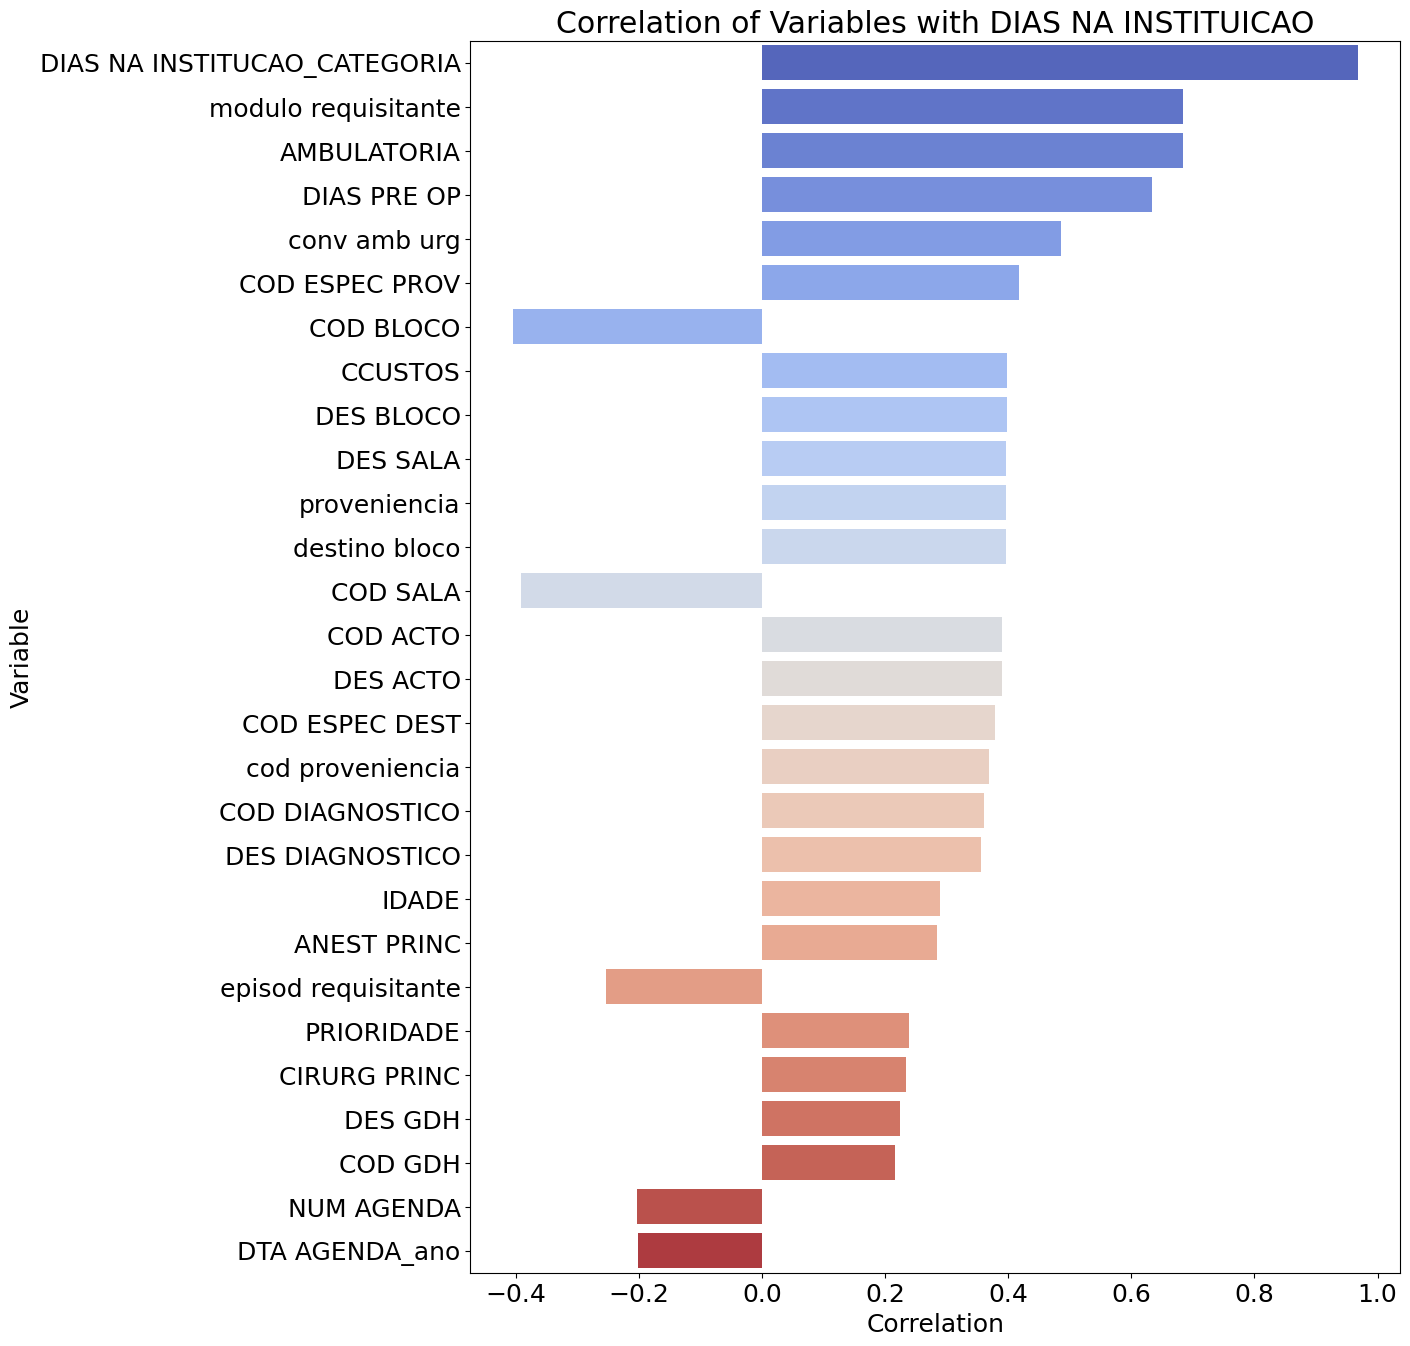

In [ ]:
# Removendo valores NaN
correlation_df = correlation_df.dropna(subset=['Correlation with DIAS NA INSTITUICAO'])

# Ordenando pelo valor absoluto da correlação
correlation_df = correlation_df.reindex(correlation_df['Correlation with DIAS NA INSTITUICAO'].abs().sort_values(ascending=False).index)
# Filtrando correlações acima de 0.2 e abaixo de -0.2
correlation_df = correlation_df[(correlation_df['Correlation with DIAS NA INSTITUICAO'] > 0.2) | (correlation_df['Correlation with DIAS NA INSTITUICAO'] < -0.2)]
# Criando o gráfico de barras horizontais
plt.figure(figsize=(12, 16))
sns.barplot(x='Correlation with DIAS NA INSTITUICAO', y='Variable', data=correlation_df, palette='coolwarm')
plt.title('Correlation of Variables with DIAS NA INSTITUICAO')
plt.xlabel('Correlation')
plt.ylabel('Variable')
plt.show()


In [ ]:
  
df["CCUSTOS"].value_counts()

CCUSTOS
2500000 - BO CENTRAL 1                     2871
1250080 - UCA-UNIDADE CIR.AMBULATORIO 7     168
2500070 - BO NEUROCIRURGIA                   88
2500160 - BLOCO OPERATORIO CENTRAL 7          5
Name: count, dtype: int64

In [ ]:
df["AMBULATORIA"].value_counts()

AMBULATORIA
N    2964
S     168
Name: count, dtype: int64

In [ ]:
df["DIAS NA INSTITUICAO_label"].value_counts()

DIAS NA INSTITUICAO_label
1    1138
2    1092
3     564
0     338
Name: count, dtype: int64

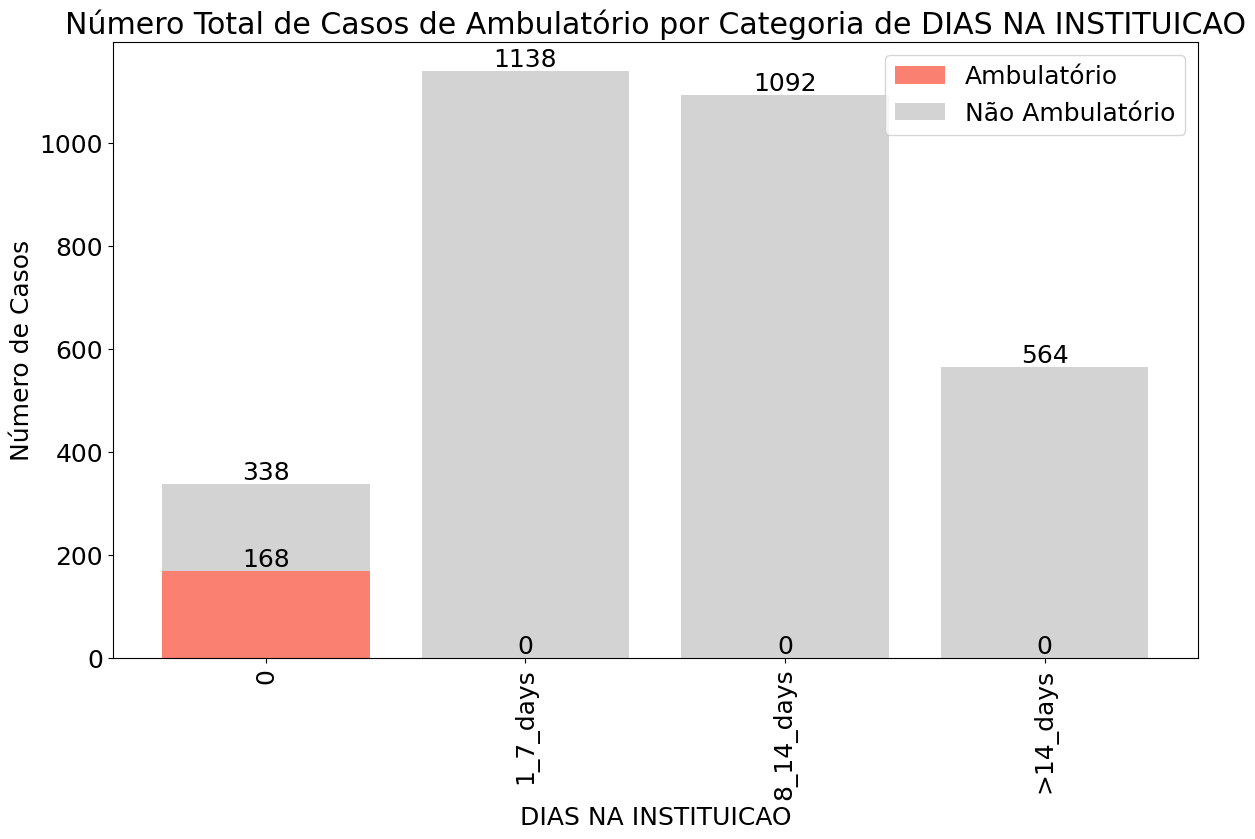

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assumindo que df é seu DataFrame
# Calculando a contagem de AMBULATORIA para cada categoria de DIAS NA INSTITUICAO_label
dia_counts = df.groupby("DIAS NA INSTITUICAO_label")["AMBULATORIA"].value_counts().unstack().fillna(0)

# Calculando o total de casos por categoria de DIAS NA INSTITUICAO_label
total_counts = dia_counts.sum(axis=1)

# Ordenando por número total de casos em ordem decrescente
sorted_indices = total_counts.sort_values(ascending=False).index
dia_counts = dia_counts.loc[sorted_indices]
total_counts = total_counts.loc[sorted_indices]

# Plotando o gráfico de barras empilhadas
fig, ax = plt.subplots(figsize=(14, 8))

# Plotando os casos de AMBULATORIA (assumindo que 'S' significa Ambulatório e 'N' não-Ambulatório)
if 'S' in dia_counts.columns:
    dia_bars = ax.bar(dia_counts.index, dia_counts['S'], color='salmon', label='Ambulatório')
else:
    dia_bars = ax.bar(dia_counts.index, 0, color='salmon', label='Ambulatório')

# Plotando o total de casos (casos não-óbito)
if 'N' in dia_counts.columns:
    non_dia_bars = ax.bar(dia_counts.index, dia_counts['N'], bottom=dia_counts.get('S', 0), color='lightgrey', label='Não Ambulatório')
else:
    non_dia_bars = ax.bar(dia_counts.index, 0, color='lightgrey', label='Não Ambulatório')

# Adicionando os números acima das barras
for idx in range(len(dia_counts)):
    total_height = total_counts.iloc[idx]
    dia_height = dia_counts.iloc[idx].get('S', 0)  # Handle cases where 'S' might not be present
    
    ax.text(dia_counts.index[idx], total_height, int(total_height), ha='center', va='bottom')
    ax.text(dia_counts.index[idx], dia_height, int(dia_height), ha='center', va='bottom', color='black')

# Definindo os rótulos personalizados do eixo x
custom_labels = ["0", "1_7_days", "8_14_days", ">14_days"]
ax.set_xticks(range(len(dia_counts.index)))
ax.set_xticklabels(custom_labels, rotation=90)

# Configurando o título e os rótulos dos eixos
ax.set_title('Número Total de Casos de Ambulatório por Categoria de DIAS NA INSTITUICAO')
ax.set_xlabel("DIAS NA INSTITUICAO")
ax.set_ylabel('Número de Casos')
ax.legend()

plt.show()


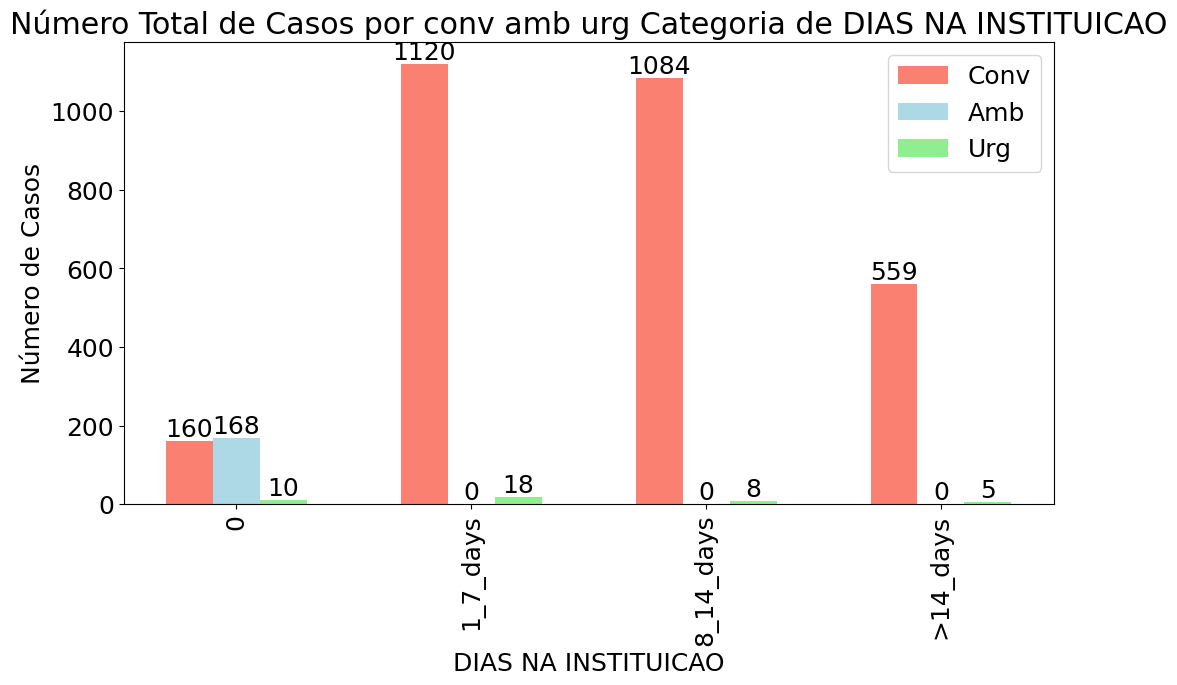

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assumindo que df é o DataFrame
# Calculando a contagem de "conv amb urg" para cada categoria de "DIAS NA INSTITUICAO_label"
dia_counts = df.groupby("DIAS NA INSTITUICAO_label")["conv amb urg"].value_counts().unstack().fillna(0)

"""# Ordenando as categorias de "DIAS NA INSTITUICAO_label" na ordem desejada
custom_labels = ["0", "1_7_days", "8_14_days", ">14_days"]
dia_counts = dia_counts.reindex(custom_labels)
"""
# Definindo as cores e labels para as barras
colors = ['salmon', 'lightblue', 'lightgreen']
labels = ['Conv', 'Amb', 'Urg']

# Configurando o gráfico de barras lado a lado
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.2  # Largura de cada barra
index = pd.Index(range(len(dia_counts)))  # Índices para as posições das barras

# Plotando as barras lado a lado
for i, (value, color, label) in enumerate(zip(dia_counts.columns, colors, labels)):
    ax.bar(index + i * bar_width, dia_counts[value], bar_width, label=label, color=color)

# Ajustando as posições dos ticks e labels do eixo x
ax.set_xticks(index + bar_width)
ax.set_xticklabels(custom_labels, rotation=90)

# Adicionando os números acima das barras
for idx in range(len(dia_counts)):
    for i, value in enumerate(dia_counts.columns):
        height = dia_counts.iloc[idx][value]
        ax.text(idx + i * bar_width, height, int(height), ha='center', va='bottom')

# Configurando o título e os rótulos dos eixos
ax.set_title('Número Total de Casos por conv amb urg Categoria de DIAS NA INSTITUICAO')
ax.set_xlabel("DIAS NA INSTITUICAO")
ax.set_ylabel('Número de Casos')
ax.legend()

plt.show()


In [ ]:
df["COD ESPEC PROV"].isna().sum()   


0

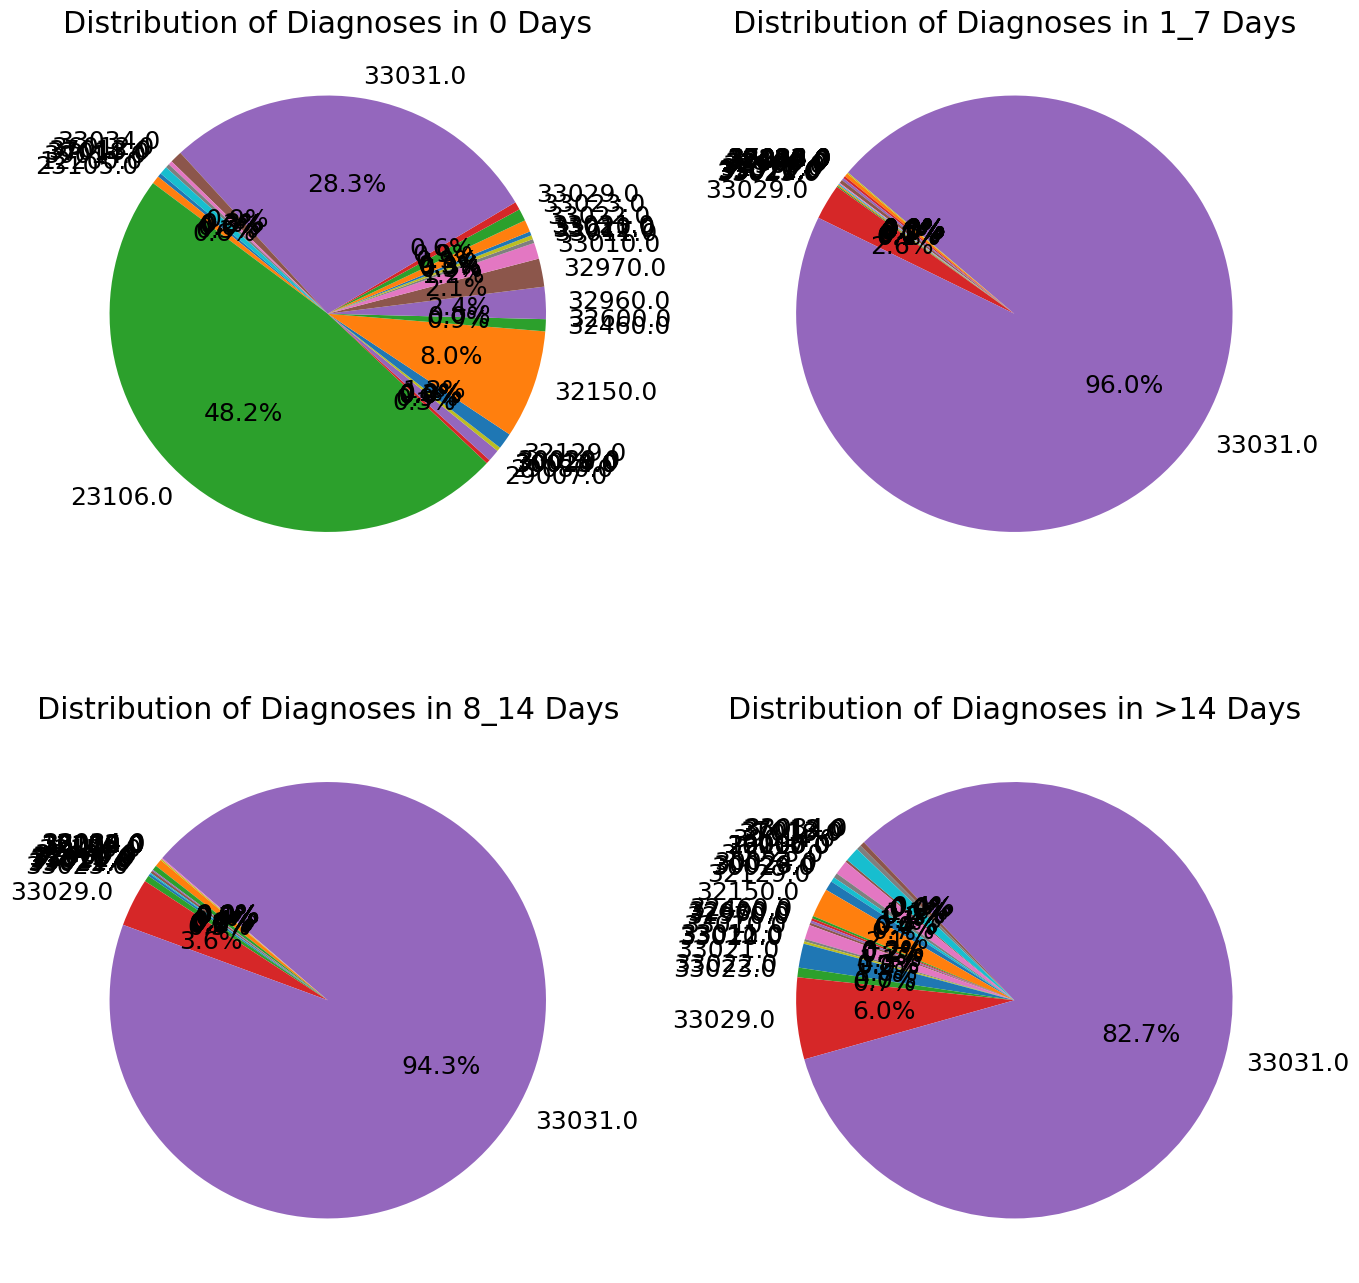

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Getting the 10 most common categories in 'DES DIAGNOSTICO'
top_30_diagnoses = df['COD ESPEC PROV'].value_counts().nlargest(30).index

# Filtering the dataframe to include only the top 10 diagnoses
filtered_df = df[df['COD ESPEC PROV'].isin(top_30_diagnoses)]

# Grouping and unstacking the data for pie chart
grouped = filtered_df.groupby('DIAS NA INSTITUICAO_label')['COD ESPEC PROV'].value_counts().unstack().fillna(0)

# Plotting the pie chart for each category
fig, axs = plt.subplots(2, 2, figsize=(14, 14))

labels = grouped.columns
categories = grouped.index
custom_labels = ["0", "1_7", "8_14", ">14"]
for ax,category, custom_label in zip(axs.flatten(), categories, custom_labels):
    data = grouped.loc[category]
    ax.pie(data, labels=labels, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Distribution of Diagnoses in {custom_label} Days')

plt.tight_layout()
plt.show()


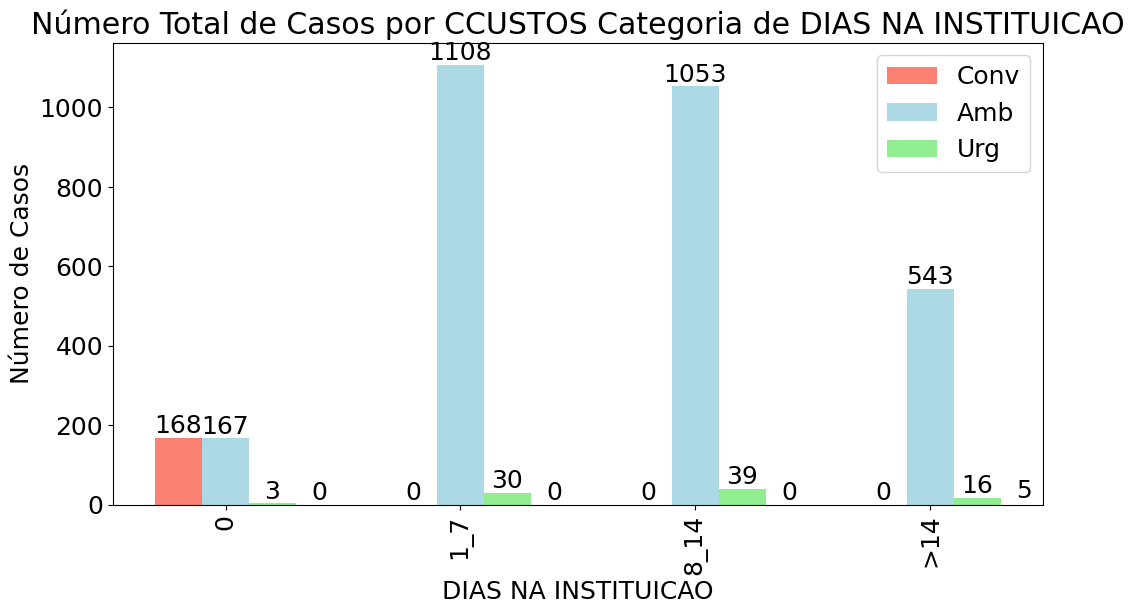

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assumindo que df é o DataFrame
# Calculando a contagem de "conv amb urg" para cada categoria de "DIAS NA INSTITUICAO_label"
dia_counts = df.groupby("DIAS NA INSTITUICAO_label")["CCUSTOS"].value_counts().unstack().fillna(0)

"""# Ordenando as categorias de "DIAS NA INSTITUICAO_label" na ordem desejada
custom_labels = ["0", "1_7_days", "8_14_days", ">14_days"]
dia_counts = dia_counts.reindex(custom_labels)
"""
# Definindo as cores e labels para as barras
colors = ['salmon', 'lightblue', 'lightgreen']
labels = ['Conv', 'Amb', 'Urg']

# Configurando o gráfico de barras lado a lado
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.2  # Largura de cada barra
index = pd.Index(range(len(dia_counts)))  # Índices para as posições das barras

# Plotando as barras lado a lado
for i, (value, color, label) in enumerate(zip(dia_counts.columns, colors, labels)):
    ax.bar(index + i * bar_width, dia_counts[value], bar_width, label=label, color=color)

# Ajustando as posições dos ticks e labels do eixo x
ax.set_xticks(index + bar_width)
ax.set_xticklabels(custom_labels, rotation=90)

# Adicionando os números acima das barras
for idx in range(len(dia_counts)):
    for i, value in enumerate(dia_counts.columns):
        height = dia_counts.iloc[idx][value]
        ax.text(idx + i * bar_width, height, int(height), ha='center', va='bottom')

# Configurando o título e os rótulos dos eixos
ax.set_title('Número Total de Casos por CCUSTOS Categoria de DIAS NA INSTITUICAO')
ax.set_xlabel("DIAS NA INSTITUICAO")
ax.set_ylabel('Número de Casos')
ax.legend()

plt.show()


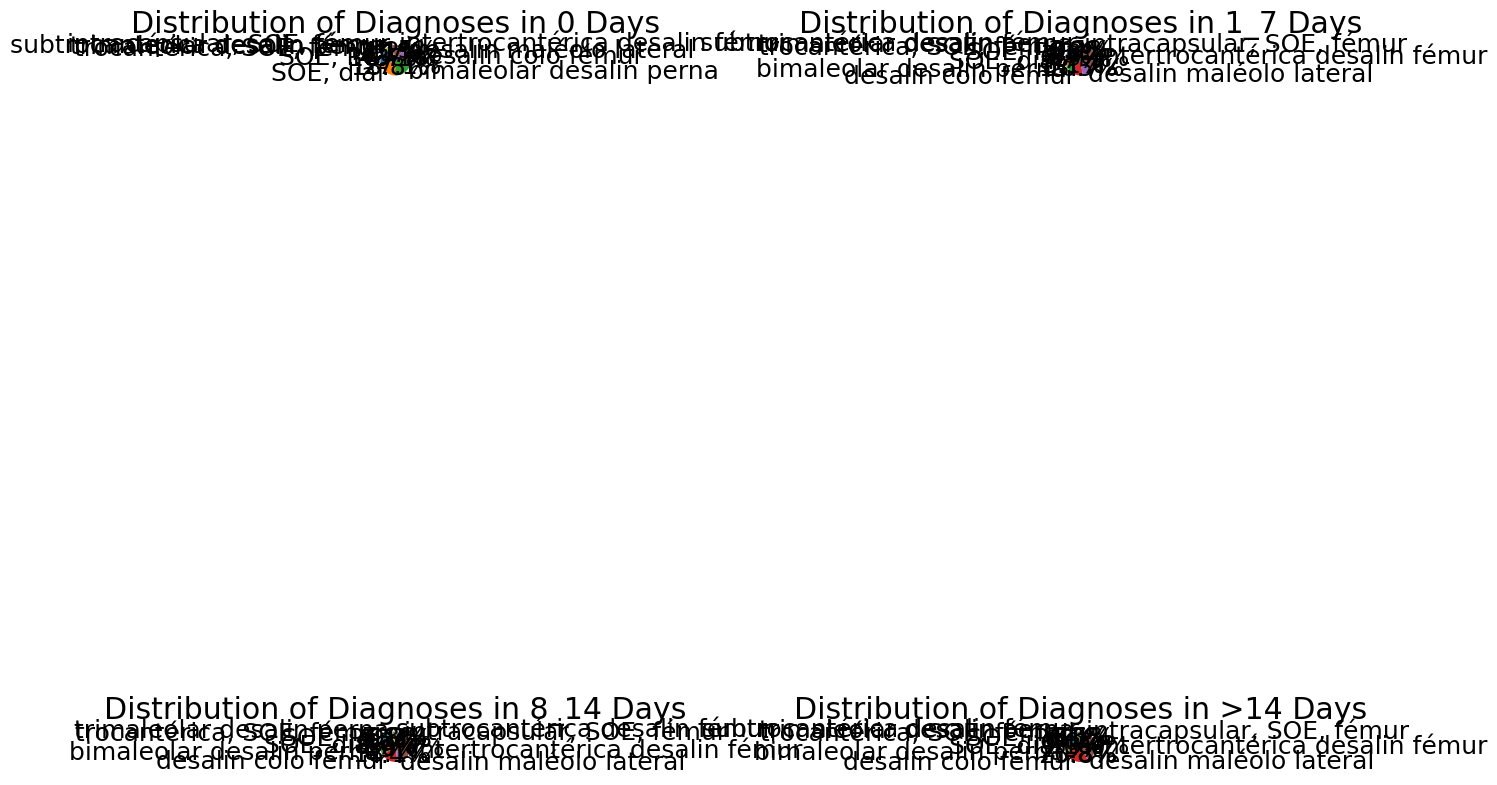

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Getting the 10 most common categories in 'DES DIAGNOSTICO'
top_10_diagnoses = df['DES DIAGNOSTICO'].value_counts().nlargest(10).index

# Filtering the dataframe to include only the top 10 diagnoses
filtered_df = df[df['DES DIAGNOSTICO'].isin(top_10_diagnoses)]

# Grouping and unstacking the data for pie chart
grouped = filtered_df.groupby('DIAS NA INSTITUICAO_label')['DES DIAGNOSTICO'].value_counts().unstack().fillna(0)

# Plotting the pie chart for each category
fig, axs = plt.subplots(2, 2, figsize=(14, 14))

labels = grouped.columns
categories = grouped.index
custom_labels = ["0", "1_7", "8_14", ">14"]
for ax,category, custom_label in zip(axs.flatten(), categories, custom_labels):
    data = grouped.loc[category]
    ax.pie(data, labels=labels, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Distribution of Diagnoses in {custom_label} Days')

plt.tight_layout()
plt.show()


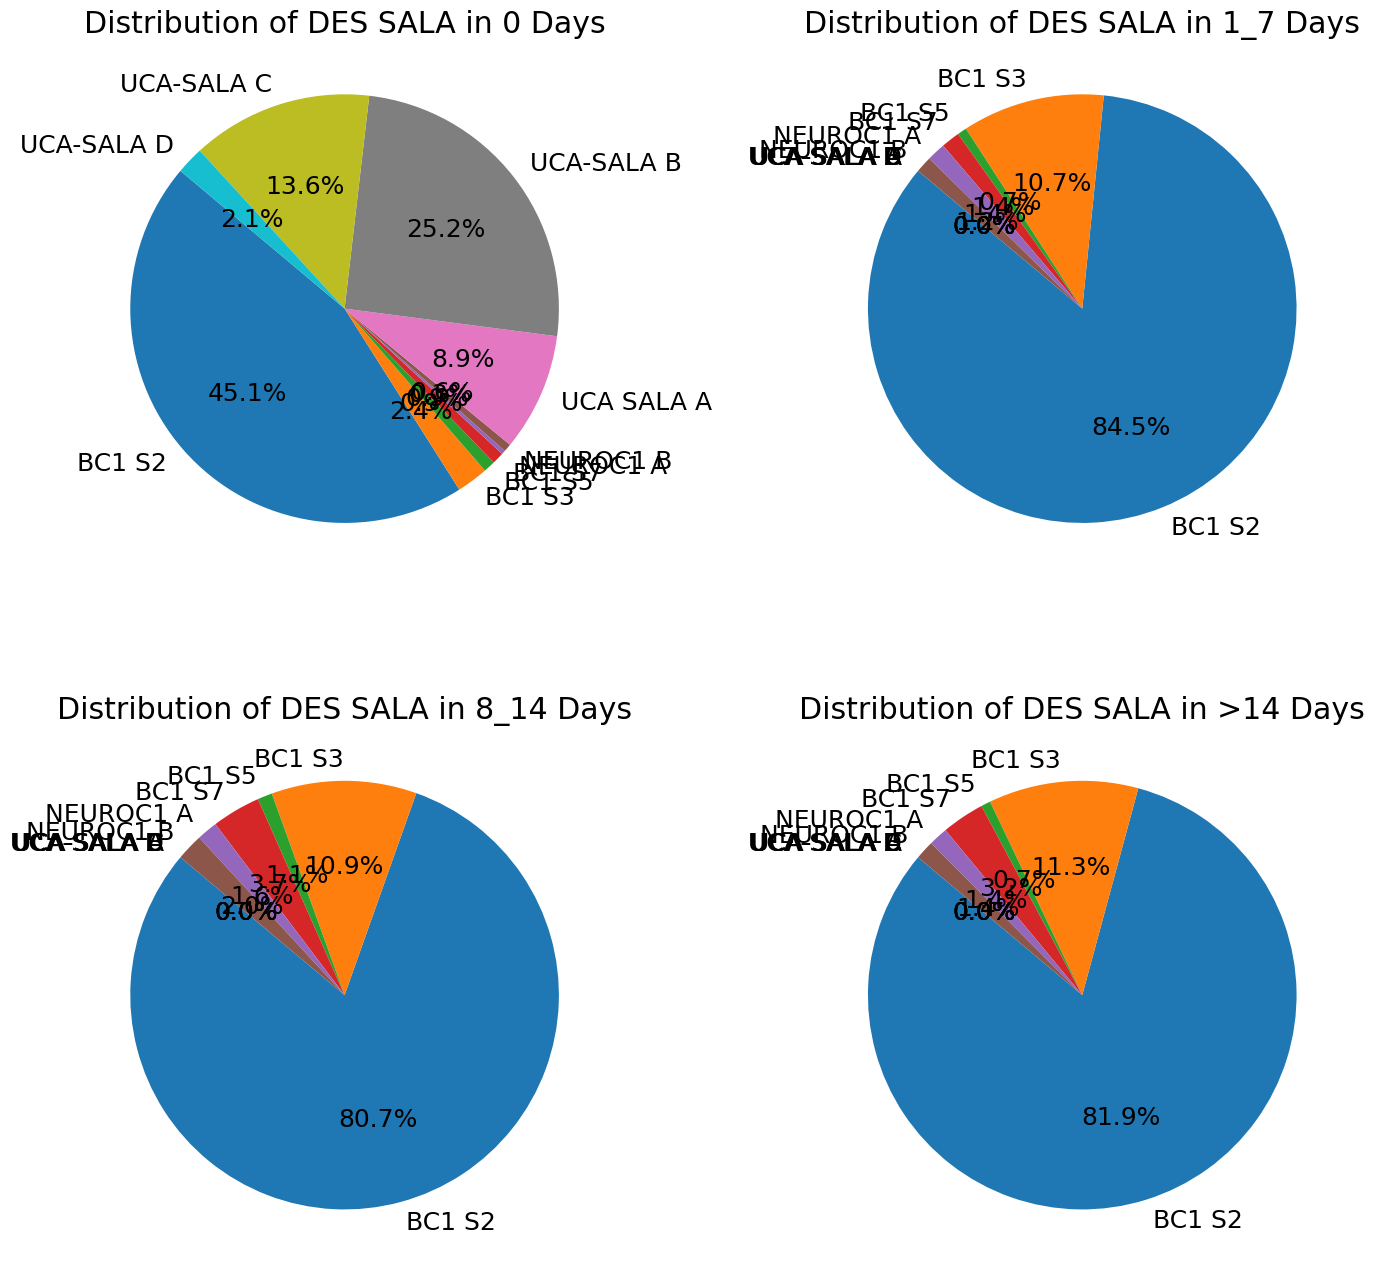

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Getting the 10 most common categories in 'DES DIAGNOSTICO'
top_10_diagnoses = df["DES SALA"].value_counts().nlargest(10).index

# Filtering the dataframe to include only the top 10 diagnoses
filtered_df = df[df["DES SALA"].isin(top_10_diagnoses)]

# Grouping and unstacking the data for pie chart
grouped = filtered_df.groupby('DIAS NA INSTITUICAO_label')["DES SALA"].value_counts().unstack().fillna(0)

# Plotting the pie chart for each category
fig, axs = plt.subplots(2, 2, figsize=(14, 14))

labels = grouped.columns
categories = grouped.index
custom_labels = ["0", "1_7", "8_14", ">14"]
for ax,category, custom_label in zip(axs.flatten(), categories, custom_labels):
    data = grouped.loc[category]
    ax.pie(data, labels=labels, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Distribution of DES SALA in {custom_label} Days')

plt.tight_layout()
plt.show()


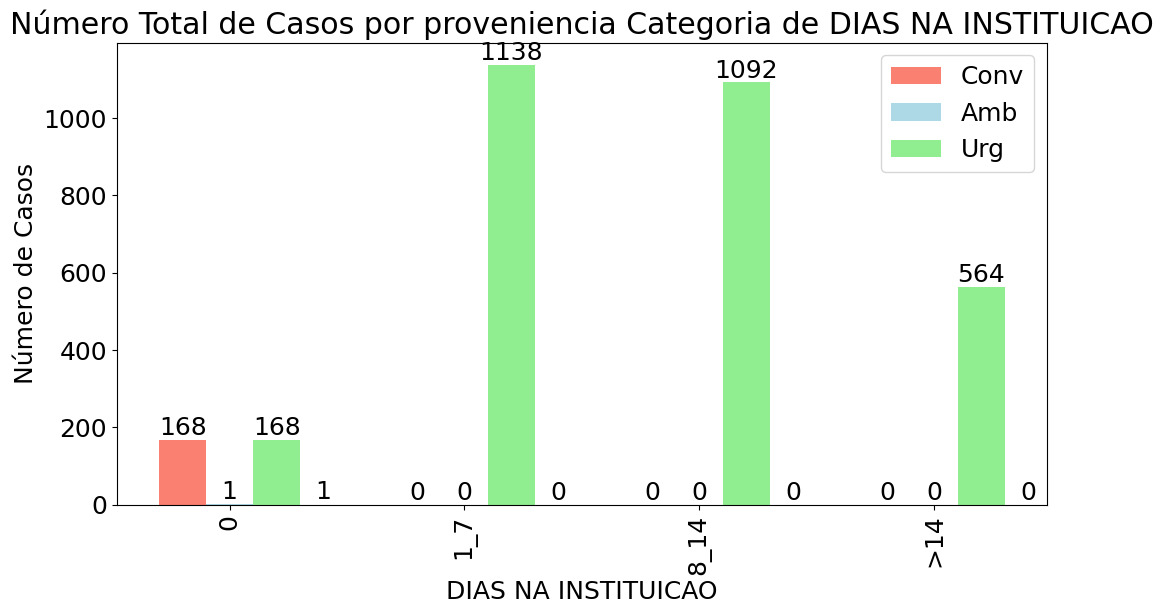

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assumindo que df é o DataFrame
# Calculando a contagem de "conv amb urg" para cada categoria de "DIAS NA INSTITUICAO_label"
dia_counts = df.groupby("DIAS NA INSTITUICAO_label")["proveniencia"].value_counts().unstack().fillna(0)

"""# Ordenando as categorias de "DIAS NA INSTITUICAO_label" na ordem desejada
custom_labels = ["0", "1_7_days", "8_14_days", ">14_days"]
dia_counts = dia_counts.reindex(custom_labels)
"""
# Definindo as cores e labels para as barras
colors = ['salmon', 'lightblue', 'lightgreen']
labels = ['Conv', 'Amb', 'Urg']

# Configurando o gráfico de barras lado a lado
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.2  # Largura de cada barra
index = pd.Index(range(len(dia_counts)))  # Índices para as posições das barras

# Plotando as barras lado a lado
for i, (value, color, label) in enumerate(zip(dia_counts.columns, colors, labels)):
    ax.bar(index + i * bar_width, dia_counts[value], bar_width, label=label, color=color)

# Ajustando as posições dos ticks e labels do eixo x
ax.set_xticks(index + bar_width)
ax.set_xticklabels(custom_labels, rotation=90)

# Adicionando os números acima das barras
for idx in range(len(dia_counts)):
    for i, value in enumerate(dia_counts.columns):
        height = dia_counts.iloc[idx][value]
        ax.text(idx + i * bar_width, height, int(height), ha='center', va='bottom')

# Configurando o título e os rótulos dos eixos
ax.set_title('Número Total de Casos por proveniencia Categoria de DIAS NA INSTITUICAO')
ax.set_xlabel("DIAS NA INSTITUICAO")
ax.set_ylabel('Número de Casos')
ax.legend()

plt.show()


In [ ]:
df["destino bloco"].value_counts()

destino bloco
SERVICO DE INTERNAMENTO      2962
CONSULTA EXTERNA              139
EXTERIOR NAO REFERENCIADO      30
OUTRO HOSPITAL                  1
Name: count, dtype: int64

In [ ]:

print(dia_counts)

proveniencia               CONSULTA EXTERNA  OUTRO HOSPITAL  SERVICO DE INTERNAMENTO  URGENCIA
DIAS NA INSTITUICAO_label                                                                     
0                                     168.0             1.0                    168.0       1.0
1                                       0.0             0.0                   1138.0       0.0
2                                       0.0             0.0                   1092.0       0.0
3                                       0.0             0.0                    564.0       0.0


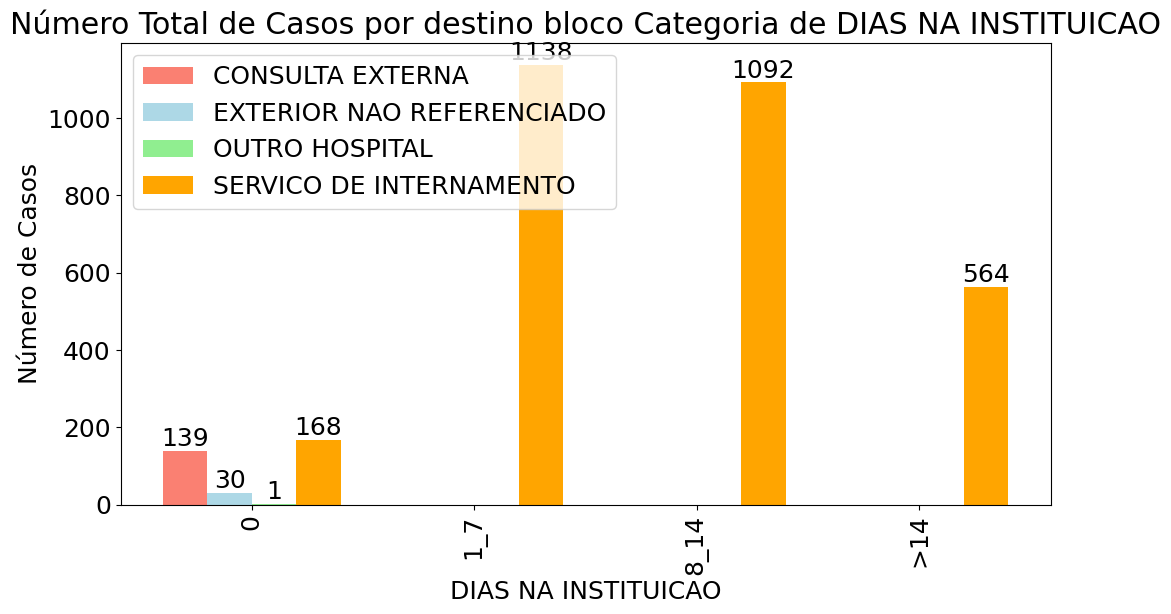

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que df é o DataFrame original
# Calculando a contagem de "conv amb urg" para cada categoria de "DIAS NA INSTITUICAO_label"
dia_counts = df.groupby("DIAS NA INSTITUICAO_label")["destino bloco"].value_counts().unstack().fillna(0)

# Ordenando as categorias de "DIAS NA INSTITUICAO_label" na ordem desejada
"""custom_labels = ["0", "1_7_days", "8_14_days", ">14_days"]
dia_counts = dia_counts.reindex(custom_labels).fillna(0)
"""
# Definindo as cores e labels para as barras
colors = ['salmon', 'lightblue', 'lightgreen', 'orange']
labels = dia_counts.columns

# Configurando o gráfico de barras lado a lado
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.2  # Largura de cada barra
index = pd.Index(range(len(dia_counts)))  # Índices para as posições das barras

# Plotando as barras lado a lado
for i, (value, color, label) in enumerate(zip(dia_counts.columns, colors, labels)):
    ax.bar(index + i * bar_width, dia_counts[value], bar_width, label=label, color=color)

# Ajustando as posições dos ticks e labels do eixo x
ax.set_xticks(index + bar_width * (len(dia_counts.columns) - 1) / 2)
ax.set_xticklabels(custom_labels, rotation=90)

# Adicionando os números acima das barras
for idx in range(len(dia_counts)):
    for i, value in enumerate(dia_counts.columns):
        height = dia_counts.iloc[idx][value]
        if height > 0:  # Verificando se o valor é maior que zero
            ax.text(idx + i * bar_width, height, int(height), ha='center', va='bottom')

# Configurando o título e os rótulos dos eixos
ax.set_title('Número Total de Casos por destino bloco Categoria de DIAS NA INSTITUICAO')
ax.set_xlabel("DIAS NA INSTITUICAO")
ax.set_ylabel('Número de Casos')
ax.legend()

plt.show()


In [ ]:
dia_counts

destino bloco              CONSULTA EXTERNA  EXTERIOR NAO REFERENCIADO  OUTRO HOSPITAL  SERVICO DE INTERNAMENTO
DIAS NA INSTITUICAO_label                                                                                      
0                                     139.0                       30.0             1.0                    168.0
1                                       0.0                        0.0             0.0                   1138.0
2                                       0.0                        0.0             0.0                   1092.0
3                                       0.0                        0.0             0.0                    564.0

In [ ]:
"""COD ACTO                              0.389464
82                      DES ACTO                              0.389464
5                 COD ESPEC DEST                              0.378070
63              cod proveniencia                              0.367811
79               COD DIAGNOSTICO                              0.359971
84               DES DIAGNOSTICO                              0.355682"""

'COD ACTO                              0.389464\n82                      DES ACTO                              0.389464\n5                 COD ESPEC DEST                              0.378070\n63              cod proveniencia                              0.367811\n79               COD DIAGNOSTICO                              0.359971\n84               DES DIAGNOSTICO                              0.355682'

<Axes: xlabel='COD ACTO'>

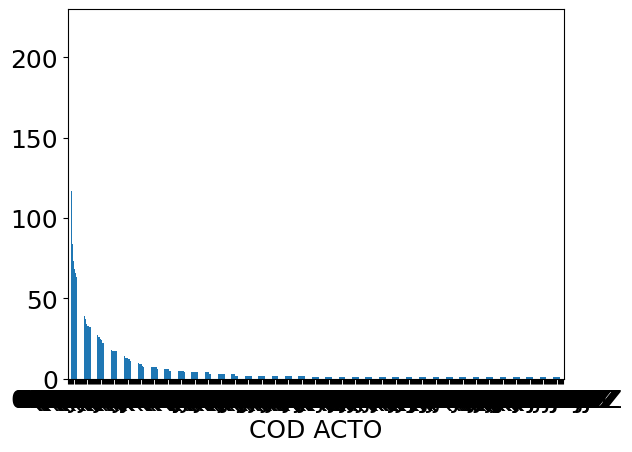

In [ ]:
df["COD ACTO"].value_counts().plot(kind="bar", rot=0    )

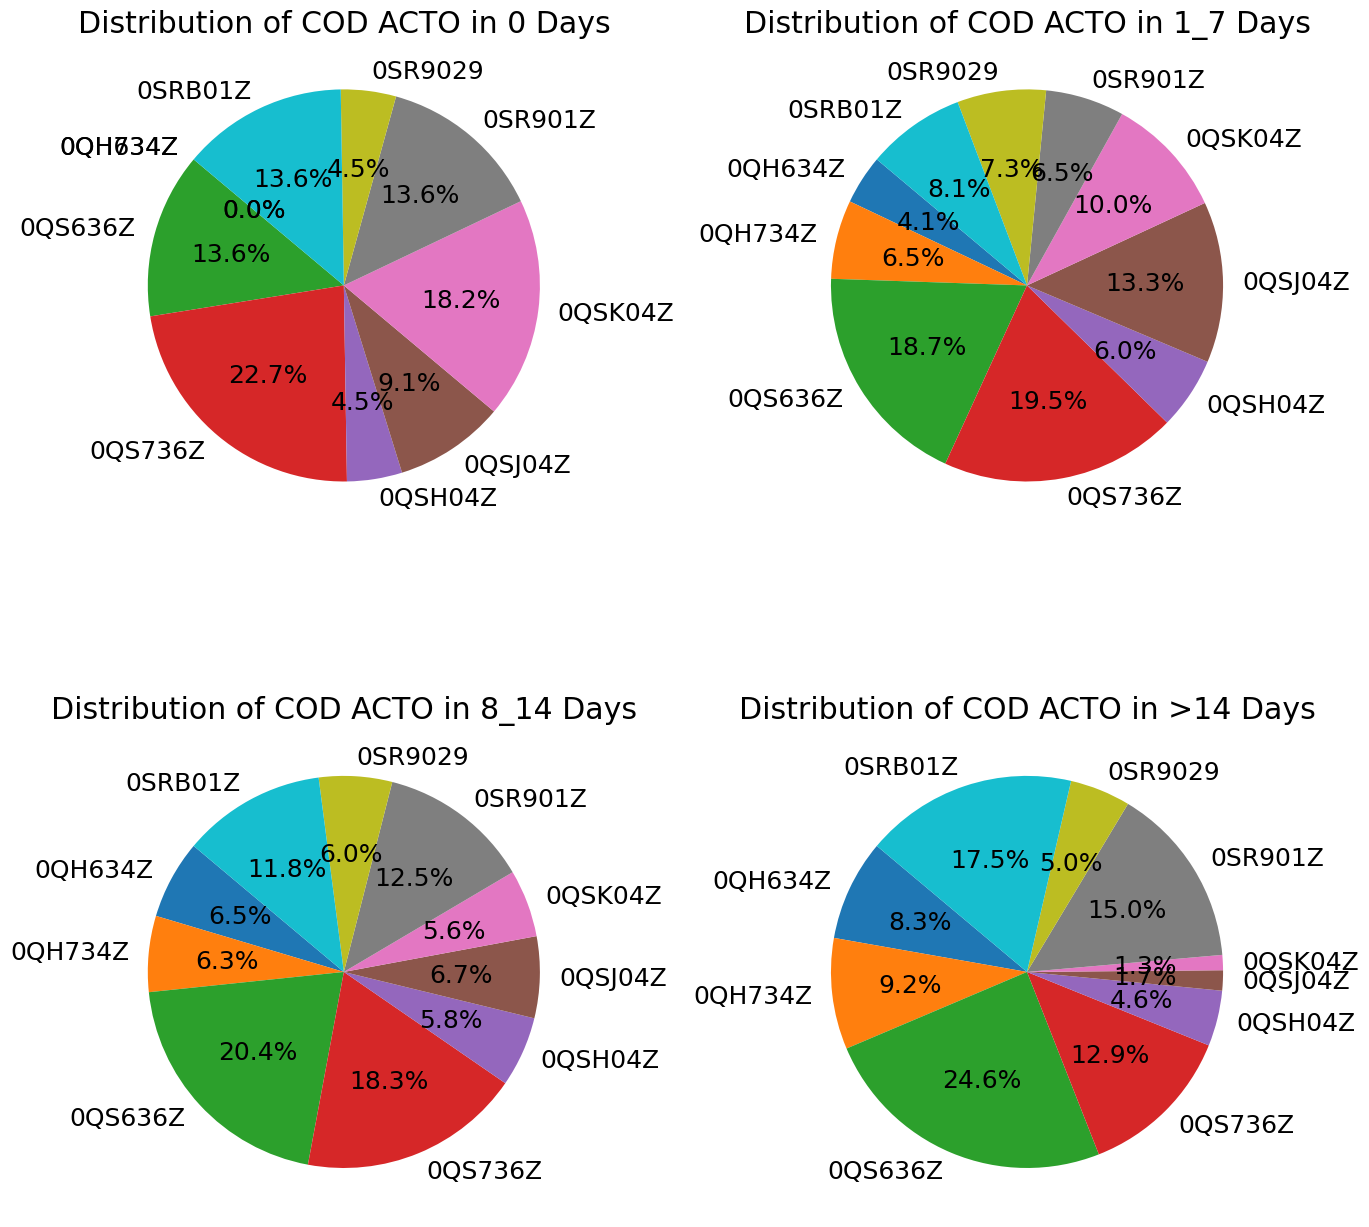

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Getting the 10 most common categories in 'DES DIAGNOSTICO'
top_10_diagnoses = df['COD ACTO'].value_counts().nlargest(10).index

# Filtering the dataframe to include only the top 10 diagnoses
filtered_df = df[df['COD ACTO'].isin(top_10_diagnoses)]

# Grouping and unstacking the data for pie chart
grouped = filtered_df.groupby('DIAS NA INSTITUICAO_label')['COD ACTO'].value_counts().unstack().fillna(0)

# Plotting the pie chart for each category
fig, axs = plt.subplots(2, 2, figsize=(14, 14))

labels = grouped.columns
categories = grouped.index
custom_labels = ["0", "1_7", "8_14", ">14"]
for ax,category, custom_label in zip(axs.flatten(), categories, custom_labels):
    data = grouped.loc[category]
    ax.pie(data, labels=labels, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Distribution of COD ACTO in {custom_label} Days')

plt.tight_layout()
plt.show()


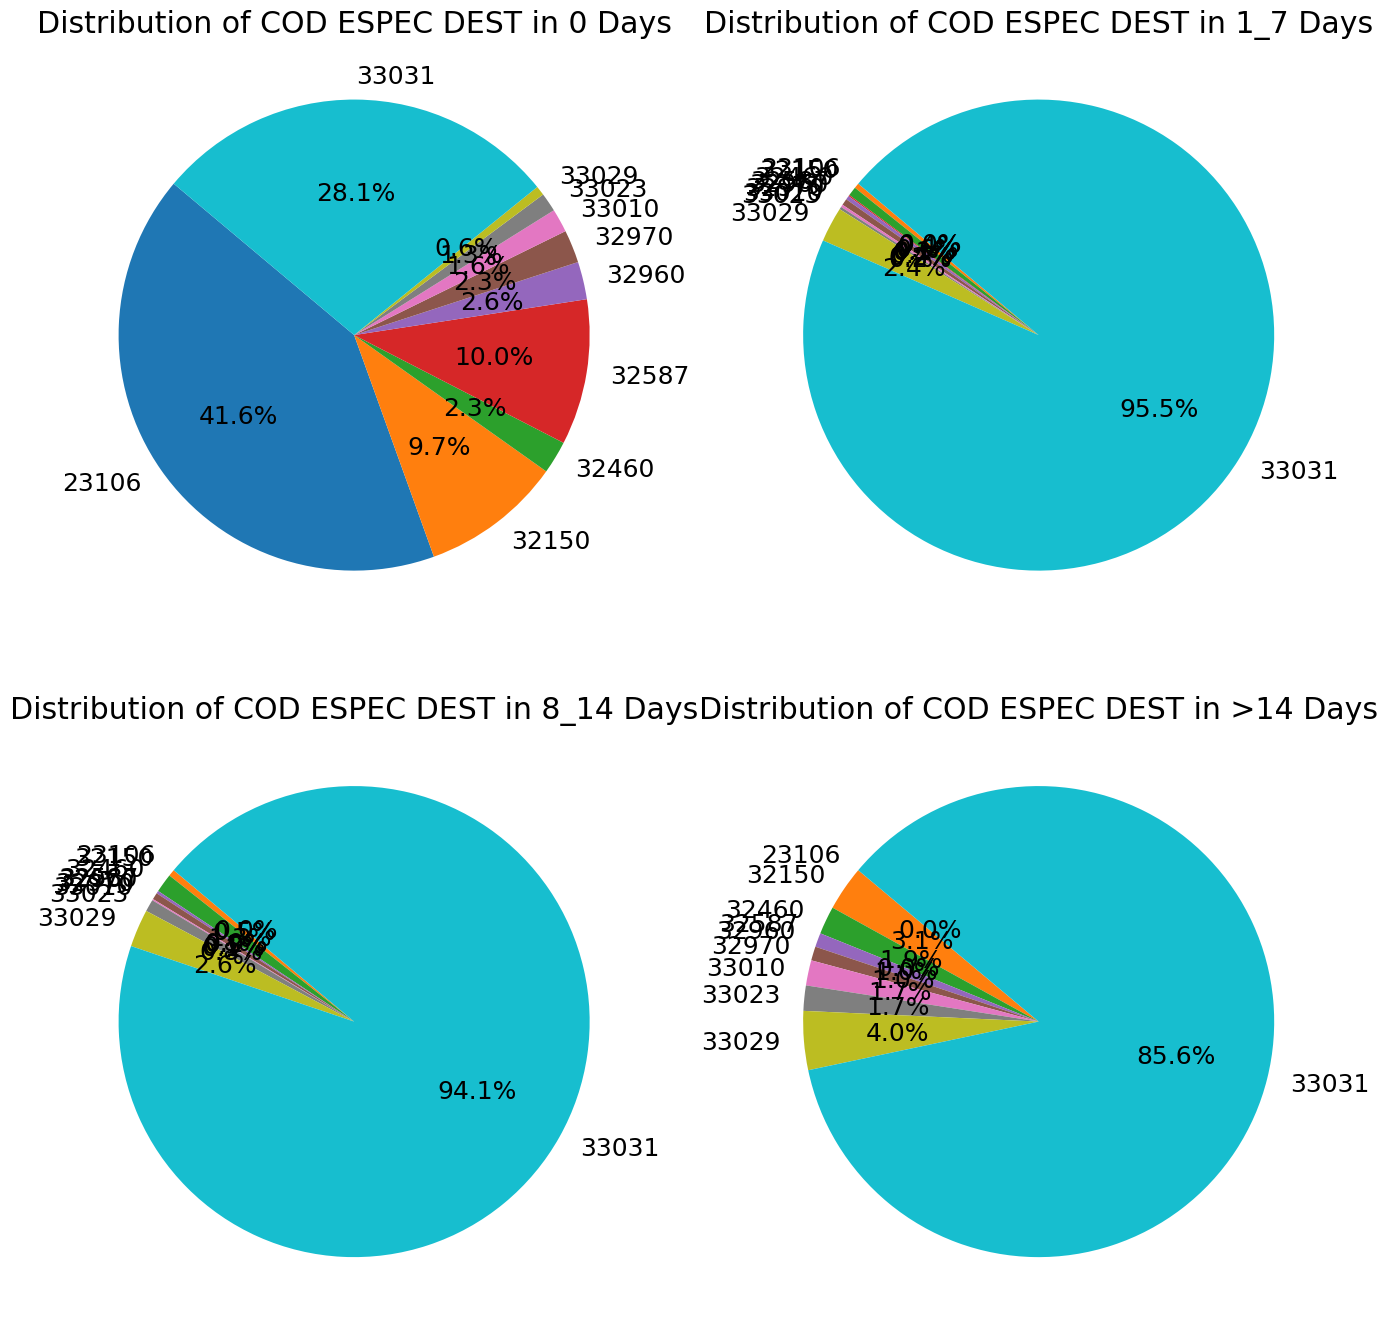

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Getting the 10 most common categories in 'DES DIAGNOSTICO'
top_10_diagnoses = df['COD ESPEC DEST'].value_counts().nlargest(10).index

# Filtering the dataframe to include only the top 10 diagnoses
filtered_df = df[df['COD ESPEC DEST'].isin(top_10_diagnoses)]

# Grouping and unstacking the data for pie chart
grouped = filtered_df.groupby('DIAS NA INSTITUICAO_label')['COD ESPEC DEST'].value_counts().unstack().fillna(0)

# Plotting the pie chart for each category
fig, axs = plt.subplots(2, 2, figsize=(14, 14))

labels = grouped.columns
categories = grouped.index
custom_labels = ["0", "1_7", "8_14", ">14"]
for ax,category, custom_label in zip(axs.flatten(), categories, custom_labels):
    data = grouped.loc[category]
    ax.pie(data, labels=labels, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Distribution of COD ESPEC DEST in {custom_label} Days')

plt.tight_layout()
plt.show()


In [ ]:
#IGUAL À VARIAVEL proveniencia
df["cod proveniencia"].value_counts()

cod proveniencia
3    2962
2     168
1       1
9       1
Name: count, dtype: int64

In [ ]:
df["COD DIAGNOSTICO"].value_counts()

COD DIAGNOSTICO
S721    650
S720    612
S828    233
S422    130
S826    118
S722     97
S822     95
S423     82
S821     81
S525     76
S723     69
S420     58
S724     54
S820     50
S520     47
T841     44
T846     41
M970     39
S324     31
S424     28
S521     28
S823     27
S522     27
S523     26
T840     25
S860     24
S825     20
M86      20
M971     20
T844     18
S761     18
S920     18
M843     13
S328     11
S923     11
S321     10
S431     10
T845     10
S421      8
S334      7
M96       7
T842      6
S623      6
S930      5
S626      5
S529      5
S531      5
T814      5
S622      4
M66       4
M         4
M844      4
S323      3
L7        3
M8        3
S620      3
T849      3
M12       2
T847      2
T848      2
S462      2
M06       2
S729      2
M02       2
T857      2
S922      2
S862      2
M24       2
M7        2
S728      2
M846      2
S933      2
M9        2
S934      2
M973      2
T813      2
S325      2
S332      2
S999      1
T799      1
T79A      1
T859      1


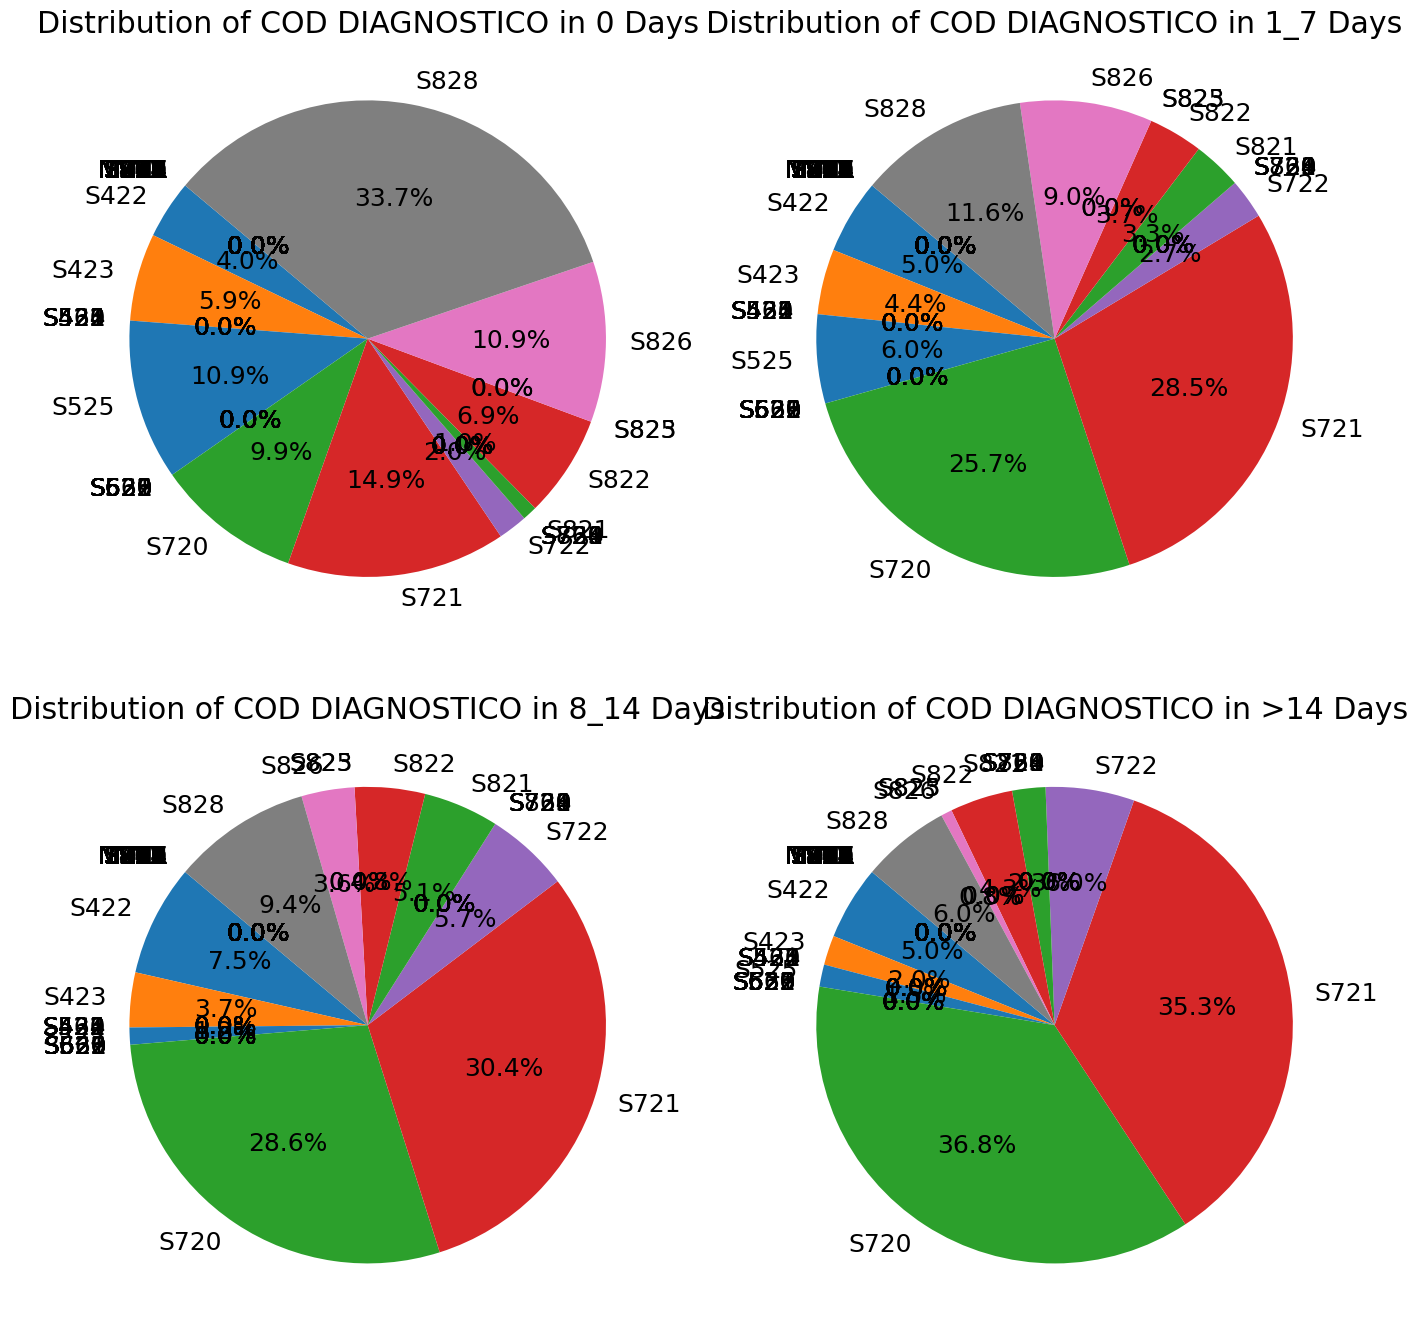

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Getting the 10 most common categories in 'DES DIAGNOSTICO'
top_10_diagnoses = df['COD DIAGNOSTICO'].value_counts().nlargest(10).index

# Filtering the dataframe to include only the top 10 diagnoses
filtered_df = df[df['COD DIAGNOSTICO'].isin(top_10_diagnoses)]

# Grouping and unstacking the data for pie chart
grouped = filtered_df.groupby('DIAS NA INSTITUICAO_label')['COD DIAGNOSTICO'].value_counts().unstack().fillna(0)

# Plotting the pie chart for each category
fig, axs = plt.subplots(2, 2, figsize=(14, 14))

labels = grouped.columns
categories = grouped.index
custom_labels = ["0", "1_7", "8_14", ">14"]
for ax,category, custom_label in zip(axs.flatten(), categories, custom_labels):
    data = grouped.loc[category]
    ax.pie(data, labels=labels, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Distribution of COD DIAGNOSTICO in {custom_label} Days')

plt.tight_layout()
plt.show()
